### Kita import semua library yang akan kita butuhkan

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

c:\users\pandu\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Kita read data tersebut dan setelah itu tampilkan lima data teratas

In [2]:
df = pd.read_csv("./dataset_depresi.csv")
df.head()

,sex,Age,Married,education_level,incoming_business,depressed,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,family_history,treatment,work_interfere
0,1,28,1,10,0,0,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,No,Yes,Often
1,1,23,1,8,0,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,No,No,Rarely
2,1,22,1,9,0,0,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,No,No,Rarely
3,1,27,1,10,0,0,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,Yes,Yes,Often
4,0,59,0,10,0,0,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,No,No,Never


### Kita ubah kolom "depressed" ke urutan terakhir

In [3]:
df_depressed = df[["depressed"]]
df = df.drop(["depressed"], axis=1)
df[["depressed"]] = df_depressed
df.head()

,sex,Age,Married,education_level,incoming_business,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,family_history,treatment,work_interfere,depressed
0,1,28,1,10,0,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,No,Yes,Often,0
1,1,23,1,8,0,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,No,No,Rarely,1
2,1,22,1,9,0,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,No,No,Rarely,0
3,1,27,1,10,0,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,Yes,Yes,Often,0
4,0,59,0,10,0,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,No,No,Never,0


### Kita tampilkan info dari data tersebut

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 14 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   sex                                                                                                                                                              1429 non-null   int64 
 1   Age                                                                                                                                                              1429 non-null   int64 
 2   Married                                                                                                                             

### Rubah tulisan kolom menjadi kecil semua dan hilangkan spasi di kanan dan kiri.

In [5]:
print("Sebelum dirubah:", df.columns)
df.columns = [column.lower().strip() for column in df.columns]
print("Setelah dirubah:", df.columns)

Sebelum dirubah: Index(['sex', 'Age', 'Married', 'education_level', 'incoming_business',
       'Do you have part-time or full-time job? ',
       'Which of the following best describes your term-time accommodation?',
       'How many hours do you spend studying each day?',
       'How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?',
       'How many hours do you spend on social media per day?',
       'family_history', 'treatment', 'work_interfere', 'depressed'],
      dtype='object')
Setelah dirubah: Index(['sex', 'age', 'married', 'education_level', 'incoming_business',
       'do you have part-time or full-time job?',
       'which of the following best describes your term-time accommodation?',
       'how many hours do you spend studying each day?',
       'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home

### Kita lihat nilai unik dari setiap kolom pada data tersebut

In [6]:
for column in df.columns:
    if df[column].dtype == "object":
        print(f"Kolom '{column}': {df[column].unique()}")
    else:
        print(f"Kolom '{column}': {sorted(df[column].unique())}")

Kolom 'sex': [0, 1]
Kolom 'age': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 91]
Kolom 'married': [0, 1]
Kolom 'education_level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
Kolom 'incoming_business': [0, 1]
Kolom 'do you have part-time or full-time job?': ['Part time' 'No' 'Full time' 'Full Time' nan]
Kolom 'which of the following best describes your term-time accommodation?': ['Home (with parents)' 'University hall of residence'
 'Private rented accommodation' nan]
Kolom 'how many hours do you spend studying each day?': ['2 - 4 hours' '1 - 2 hours' 'More than 4 hours' nan]
Kolom 'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home or your student accommodation/mess/

### Kita pisahkan antar kolom kategorikal dan numerikal

In [7]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
categorical_columns = ["sex", "married", "education_level", "incoming_business", "depressed", *categorical_columns]

numerical_columns =  ["age",]

### Kita lihat kesimpulan statistik dari data tersebut

In [8]:
df.describe()

,sex,age,married,education_level,incoming_business,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
mean,0.918125,34.777467,0.772568,8.687194,0.107768,0.166550
std,0.274271,13.986219,0.419320,2.923532,0.310195,0.372704
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,25.000000,1.000000,8.000000,0.000000,0.000000
50%,1.000000,30.000000,1.000000,9.000000,0.000000,0.000000
75%,1.000000,42.000000,1.000000,10.000000,0.000000,0.000000
max,1.000000,91.000000,1.000000,19.000000,1.000000,1.000000


### Kita hapus yang memiliki nilai yang sama di baris tersebut

In [9]:
print("Sebelum dihapus:", df.shape[0])
df = df.drop_duplicates()
print("Setelah dihapus:", df.shape[0])

Sebelum dihapus: 1429
Setelah dihapus: 1325


### Kita ganti nilai kategorikal yang duplikat atau salah penamaan

In [10]:
print(f"Sebelum dirubah : {df['do you have part-time or full-time job?'].unique()}")
df['do you have part-time or full-time job?'] = df['do you have part-time or full-time job?'].map({
    'Full time': 'Full Time',
    "Part time": 'Part Time',
    "Full time ": 'Full Time',
    "No": 'No',
})
print(f"Setelah dirubah : {df['do you have part-time or full-time job?'].unique()}")

Sebelum dirubah : ['Part time' 'No' 'Full time' 'Full Time' nan]
Setelah dirubah : ['Part Time' 'No' 'Full Time' nan]


### Kita ubah data kategorikal dari dataframe menjadi data numerikal

In [11]:
categorical_columns_temp = [column for column in df.columns if df[column].dtype == 'object']
encoder = OrdinalEncoder()
df[categorical_columns_temp] = encoder.fit_transform(df[categorical_columns_temp])
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1428
Data columns (total 14 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   sex                                                                                                                                                              1325 non-null   float64
 1   age                                                                                                                                                              1325 non-null   float64
 2   married                                                                                                                         

### Kita lihat arti hasil konversi data kategorikal ke numerical

In [12]:
for column, values in zip(categorical_columns_temp, encoder.categories_,):
    for i, category in enumerate(values):
        print(f"Kategori untuk kolom '{column}' nilai '{i}' adalah {category}")
    print()

Kategori untuk kolom 'do you have part-time or full-time job?' nilai '0' adalah Full Time
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '1' adalah No
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '2' adalah Part Time
Kategori untuk kolom 'do you have part-time or full-time job?' nilai '3' adalah nan

Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '0' adalah Home (with parents)
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '1' adalah Private rented accommodation
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '2' adalah University hall of residence
Kategori untuk kolom 'which of the following best describes your term-time accommodation?' nilai '3' adalah nan

Kategori untuk kolom 'how many hours do you spend studying each day?' nilai '0' adalah 1 - 2 hours
Kategori untuk kolom 'how many hours d

### Kita lihat apakah ada data yang kosong

In [13]:
df.isna().sum()

sex                                                                                                                                                                   0
age                                                                                                                                                                   0
married                                                                                                                                                               0
education_level                                                                                                                                                       0
incoming_business                                                                                                                                                     0
do you have part-time or full-time job?                                                                                                                         

### Setelah itu kita isi data kosong tersebut dengan menggunakan KNN Imputer dan bulatkan nilai imputer untuk hasil kolom kategorikal

In [14]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
for column in categorical_columns:
    df[column] = df[column].round()
df.isna().sum()

sex                                                                                                                                                                0
age                                                                                                                                                                0
married                                                                                                                                                            0
education_level                                                                                                                                                    0
incoming_business                                                                                                                                                  0
do you have part-time or full-time job?                                                                                                                            0
which of t

### Kita lihat apakah ada outlier values untuk kolom numerikal

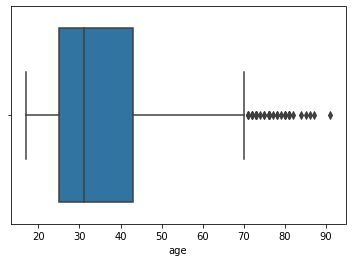

In [15]:
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Kita hapus outlier values tersebut dan kita cek hasilnya

Total data sebelum dihapus outliers:  1325
Total data sebelum dihapus outliers:  1283


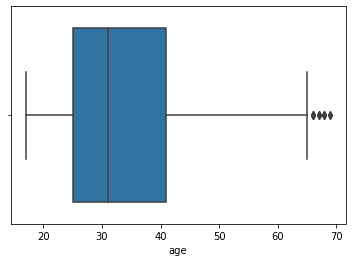

In [16]:
print("Total data sebelum dihapus outliers: ", df.shape[0])
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
print("Total data sebelum dihapus outliers: ", df.shape[0])

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

### Kita lihat distribusi untuk setiap kolom kategorikal

     Total data  Persentase
1.0        1174        91.5
0.0         109         8.5



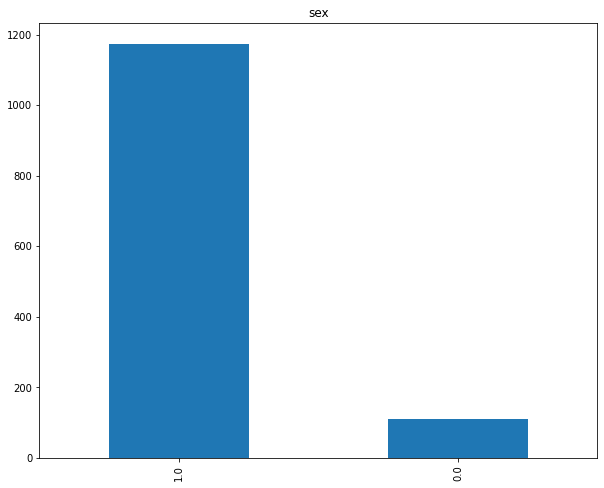

     Total data  Persentase
1.0         996        77.6
0.0         287        22.4



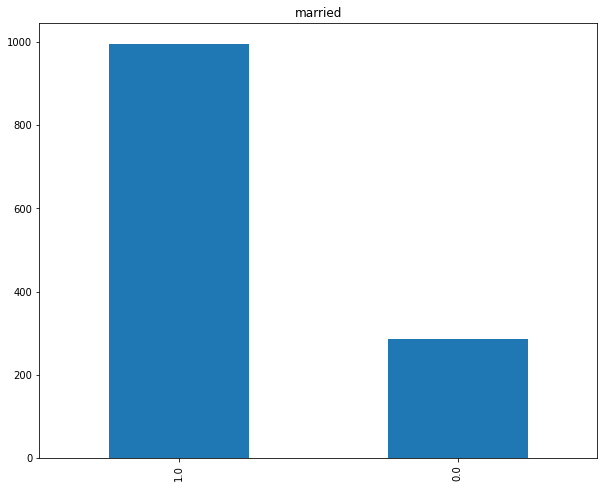

      Total data  Persentase
10.0         362        28.2
9.0          270        21.0
8.0          165        12.9
7.0           94         7.3
14.0          68         5.3
1.0           64         5.0
6.0           60         4.7
12.0          58         4.5
11.0          43         3.4
5.0           30         2.3
4.0           26         2.0
13.0          18         1.4
3.0           15         1.2
2.0            3         0.2
18.0           2         0.2
17.0           2         0.2
16.0           2         0.2
19.0           1         0.1



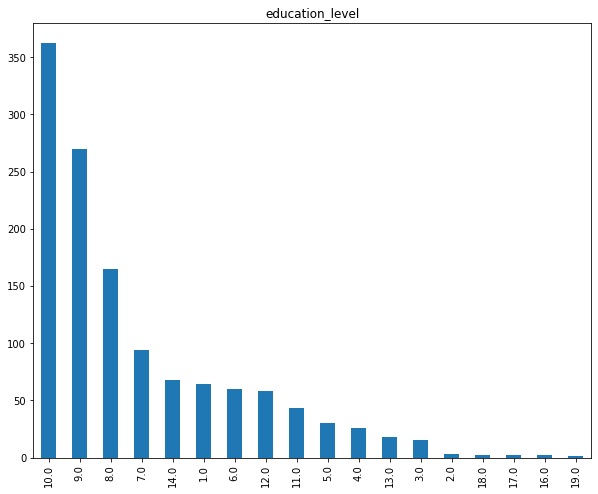

     Total data  Persentase
0.0        1134        88.4
1.0         149        11.6



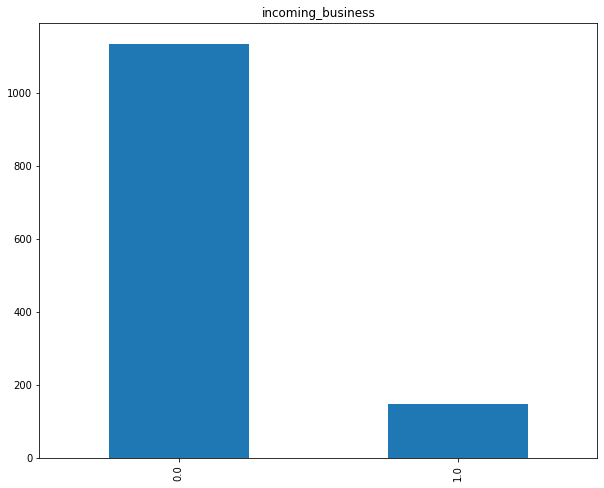

     Total data  Persentase
0.0        1063        82.9
1.0         220        17.1



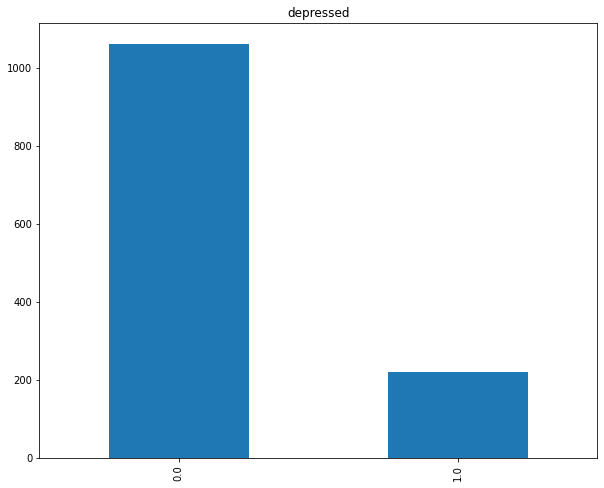

     Total data  Persentase
1.0         845        65.9
2.0         405        31.6
0.0          33         2.6



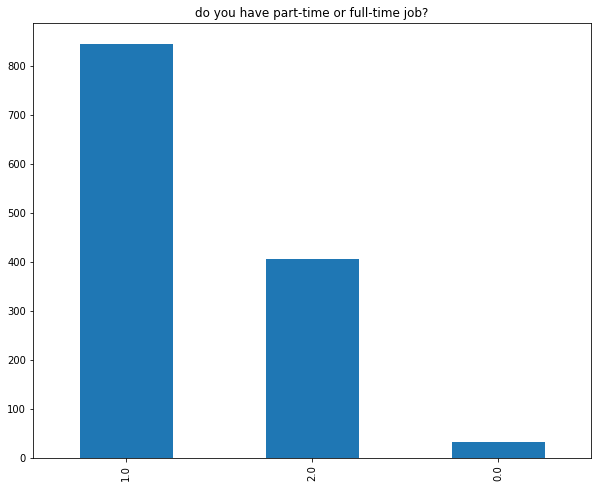

     Total data  Persentase
1.0         754        58.8
0.0         527        41.1
2.0           2         0.2



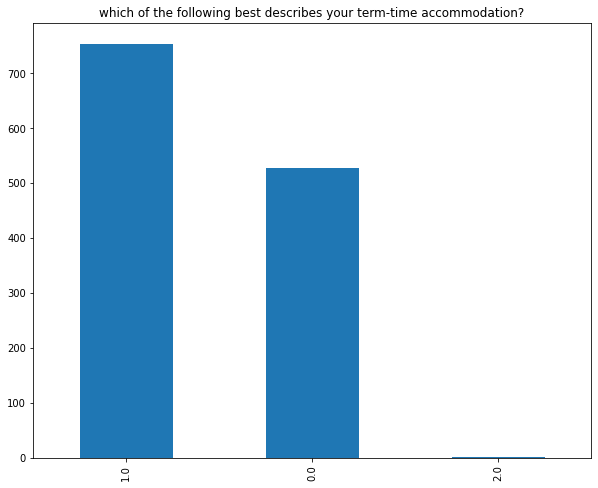

     Total data  Persentase
0.0         676        52.7
1.0         569        44.3
2.0          38         3.0



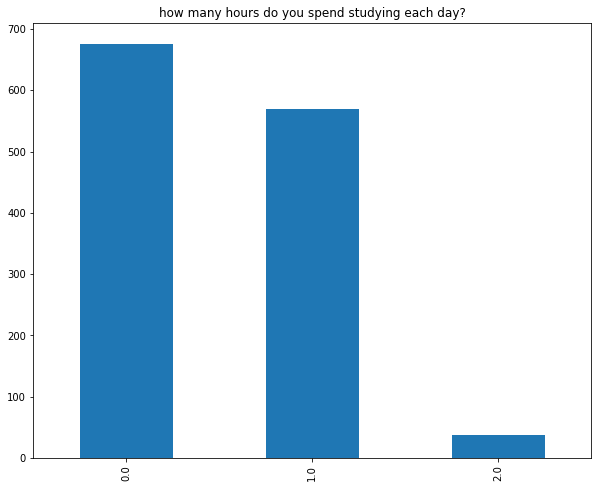

     Total data  Persentase
1.0         727        56.7
0.0         479        37.3
2.0          71         5.5
3.0           6         0.5



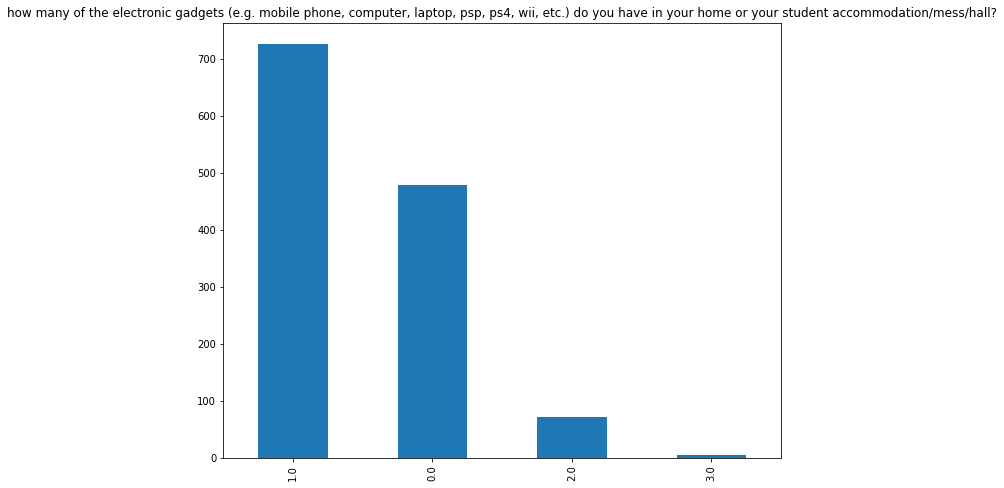

     Total data  Persentase
1.0         625        48.7
2.0         610        47.5
0.0          43         3.4
3.0           5         0.4



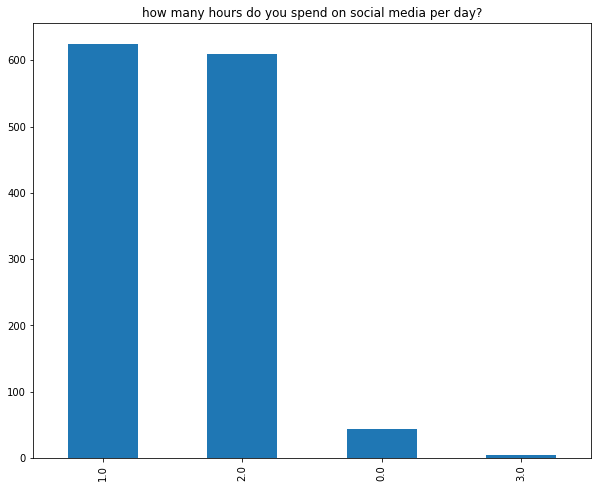

     Total data  Persentase
0.0         798        62.2
1.0         485        37.8



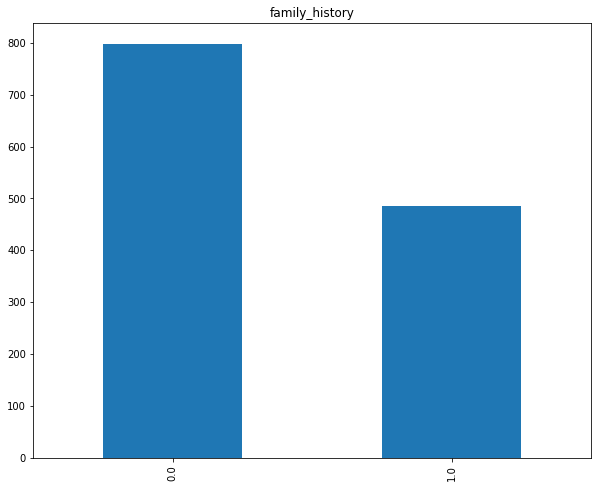

     Total data  Persentase
0.0         646        50.4
1.0         637        49.6



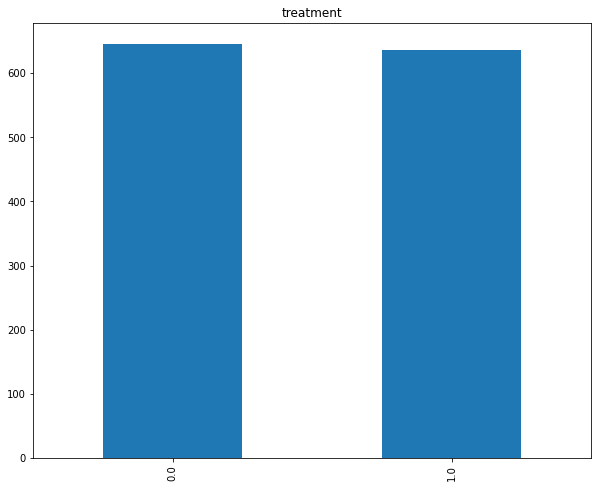

     Total data  Persentase
3.0         426        33.2
2.0         371        28.9
1.0         277        21.6
0.0         209        16.3



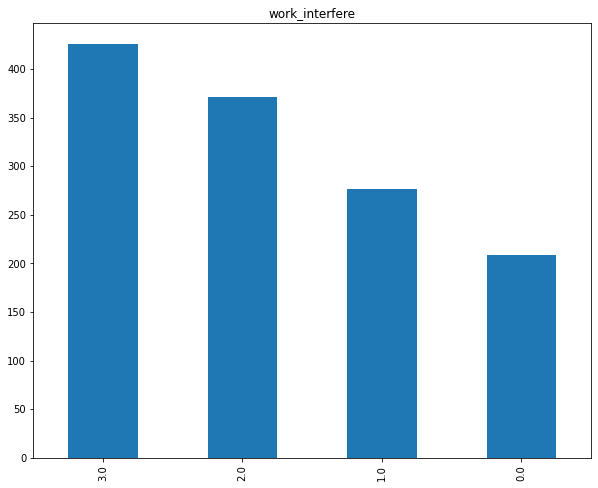

In [17]:
for column in categorical_columns:
    count = df[column].value_counts()
    percent = 100 * df[column].value_counts(normalize=True)
    df_temp = pd.DataFrame({'Total data': count, 'Persentase': percent.round(1)})
    print(df_temp, end="\n\n")
    plt.figure(figsize=(10, 8))
    count.plot(kind='bar', title=column)
    plt.show()

### Kita atasi imbalance data dengan menggunakan SMOTE

     Total data  Persentase
1.0        1961        92.2
0.0         165         7.8



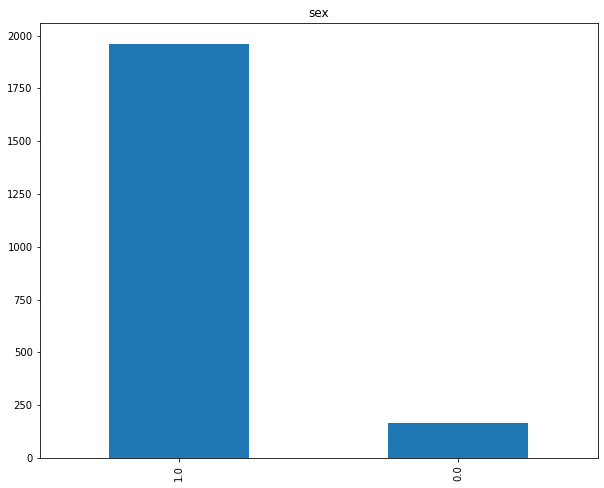

     Total data  Persentase
1.0        1664        78.3
0.0         462        21.7



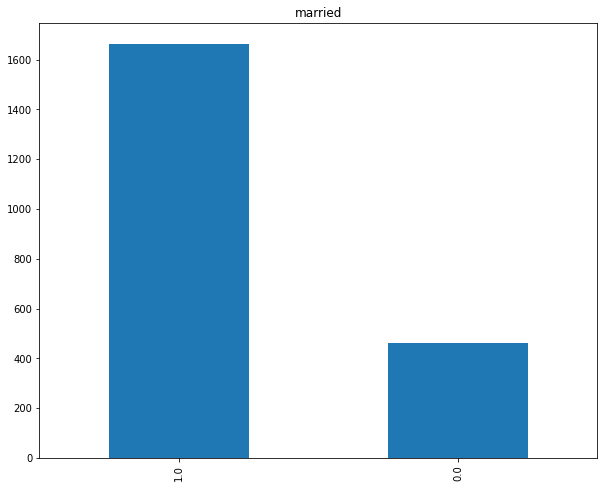

      Total data  Persentase
10.0         585        27.5
9.0          408        19.2
8.0          294        13.8
7.0          173         8.1
6.0          104         4.9
1.0          100         4.7
14.0          88         4.1
12.0          87         4.1
11.0          80         3.8
5.0           64         3.0
4.0           51         2.4
13.0          35         1.6
3.0           31         1.5
2.0           18         0.8
18.0           3         0.1
17.0           2         0.1
16.0           2         0.1
19.0           1         0.0



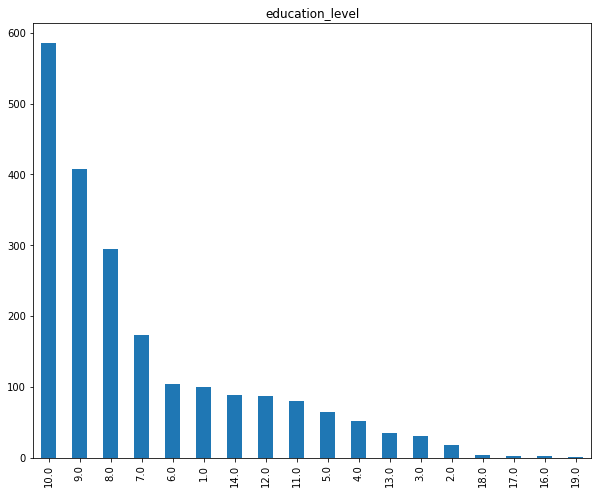

     Total data  Persentase
0.0        1903        89.5
1.0         223        10.5



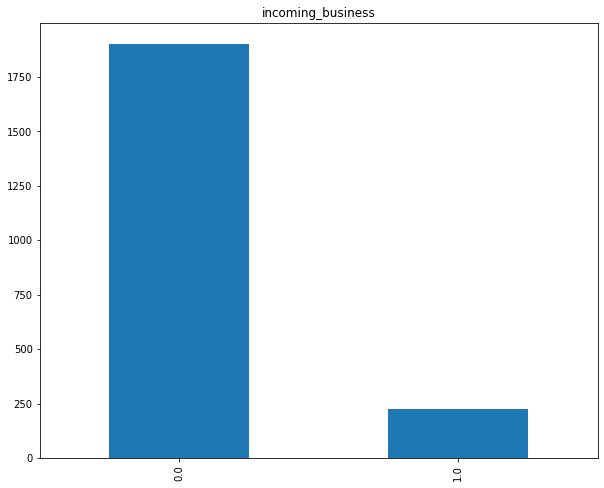

     Total data  Persentase
0.0        1063        50.0
1.0        1063        50.0



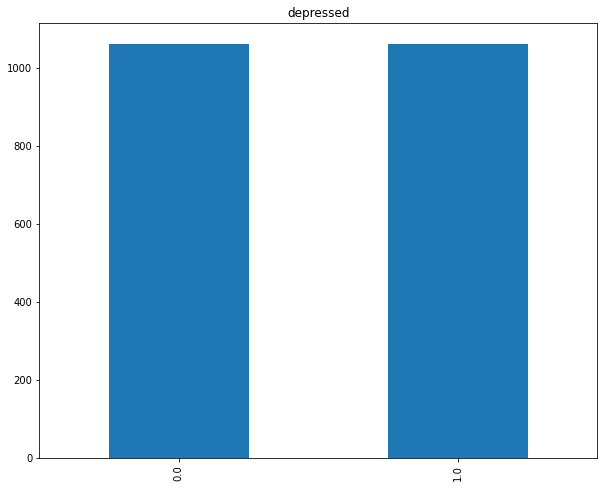

     Total data  Persentase
1.0        1398        65.8
2.0         676        31.8
0.0          52         2.4



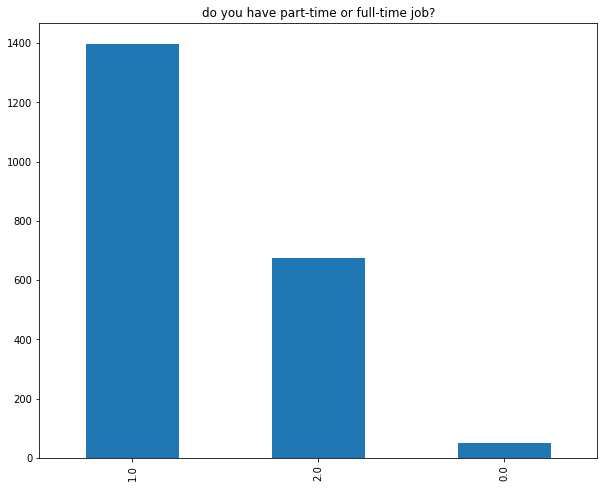

     Total data  Persentase
1.0        1268        59.6
0.0         850        40.0
2.0           8         0.4



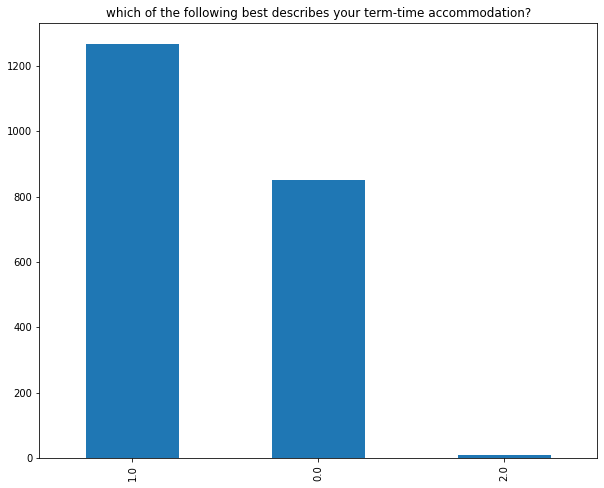

     Total data  Persentase
0.0        1145        53.9
1.0         926        43.6
2.0          55         2.6



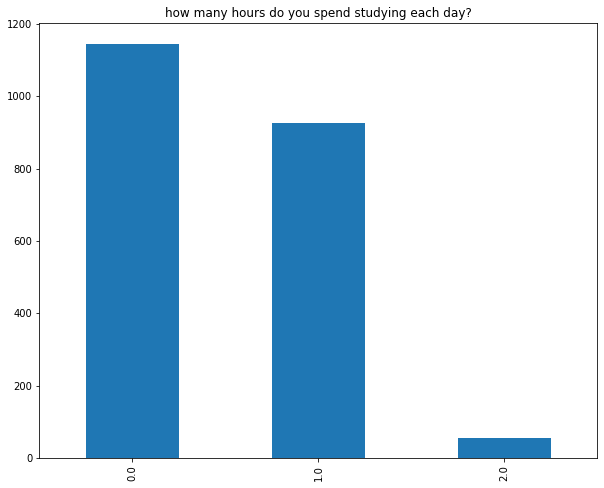

     Total data  Persentase
1.0        1227        57.7
0.0         785        36.9
2.0         105         4.9
3.0           9         0.4



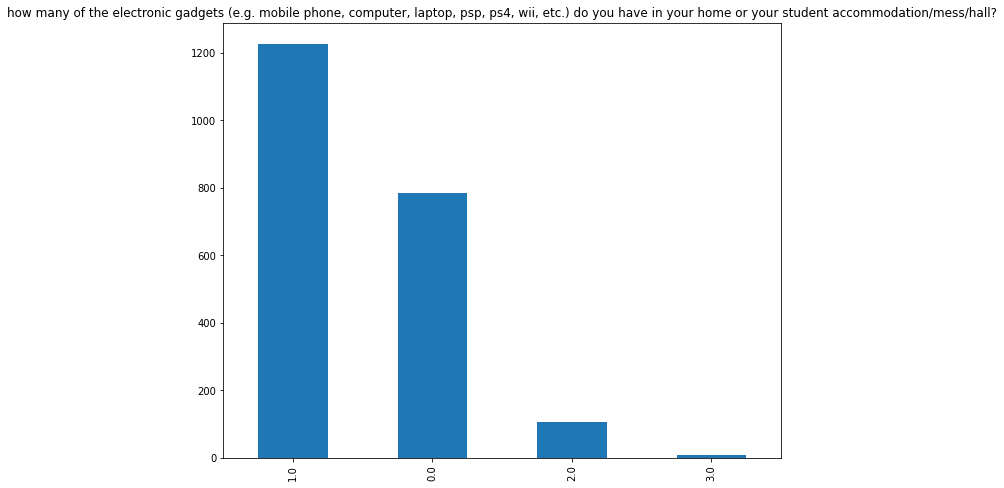

     Total data  Persentase
1.0        1056        49.7
2.0        1003        47.2
0.0          59         2.8
3.0           8         0.4



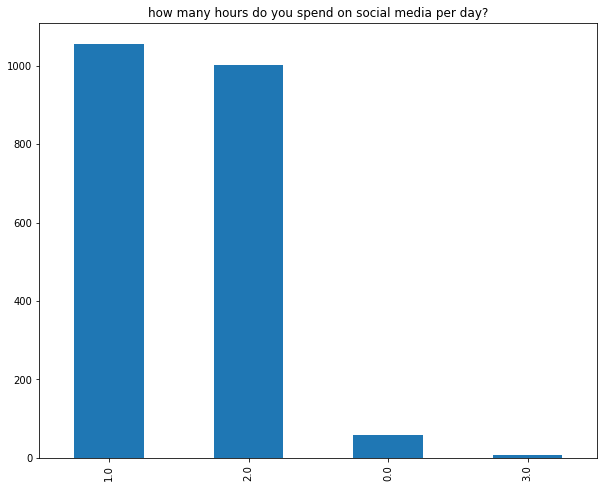

     Total data  Persentase
0.0        1302        61.2
1.0         824        38.8



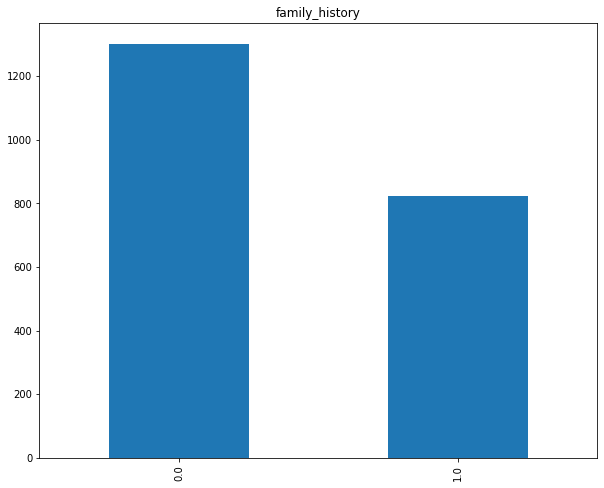

     Total data  Persentase
1.0        1103        51.9
0.0        1023        48.1



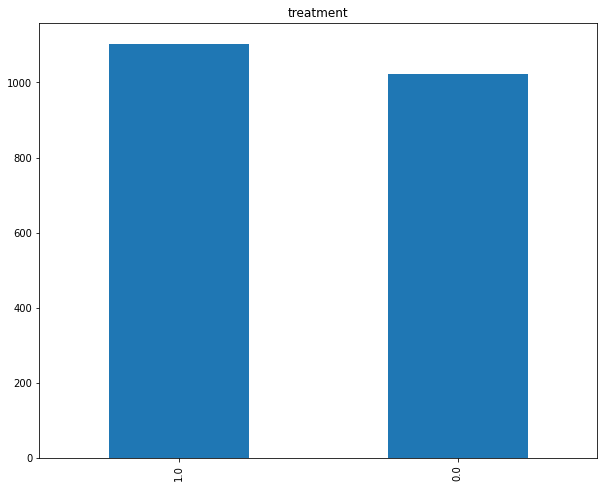

     Total data  Persentase
3.0         716        33.7
2.0         646        30.4
1.0         439        20.6
0.0         325        15.3



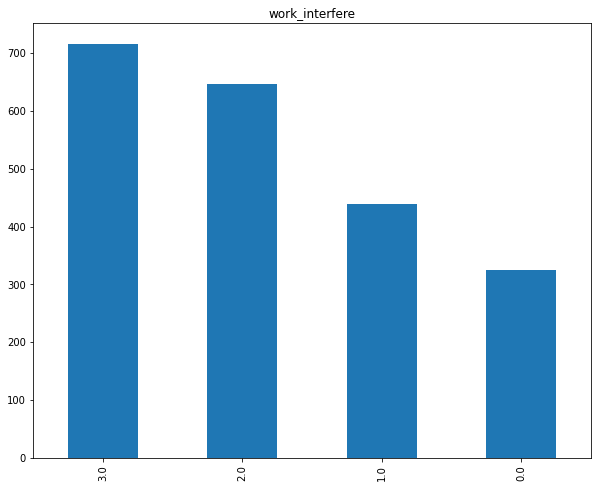

In [18]:
smote = SMOTE()
x = df.drop(["depressed"], axis=1)
y = df["depressed"]
x, y = smote.fit_resample(x, y)
df = x
df["depressed"] = y
for column in categorical_columns:
    df[column] = df[column].round()

for column in categorical_columns:
    count = df[column].value_counts()
    percent = 100 * df[column].value_counts(normalize=True)
    df_temp = pd.DataFrame({'Total data': count, 'Persentase': percent.round(1)})
    print(df_temp, end="\n\n")
    plt.figure(figsize=(10, 8))
    count.plot(kind='bar', title=column)
    plt.show()

### Kita lihat distribusi untuk setiap kolom numerikal

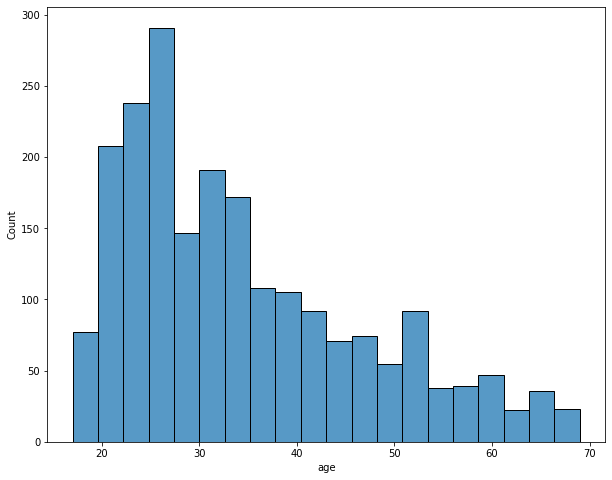

In [19]:
for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[column])
    plt.show()

### Kita lihat distribusi data relatif terhadap kolom yang akan diprediksi

<Figure size 720x576 with 0 Axes>

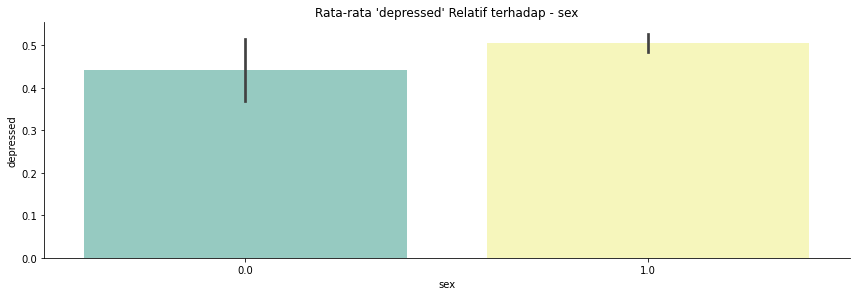

<Figure size 720x576 with 0 Axes>

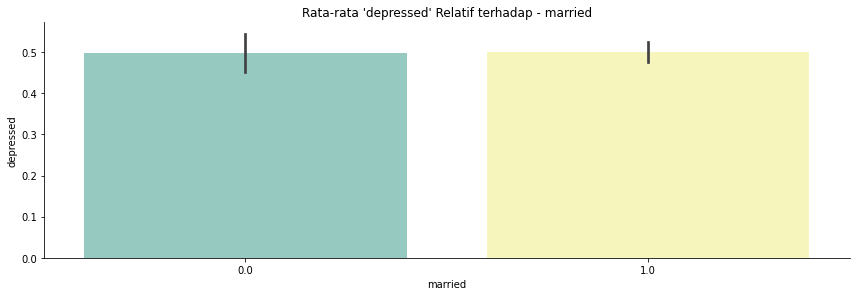

<Figure size 720x576 with 0 Axes>

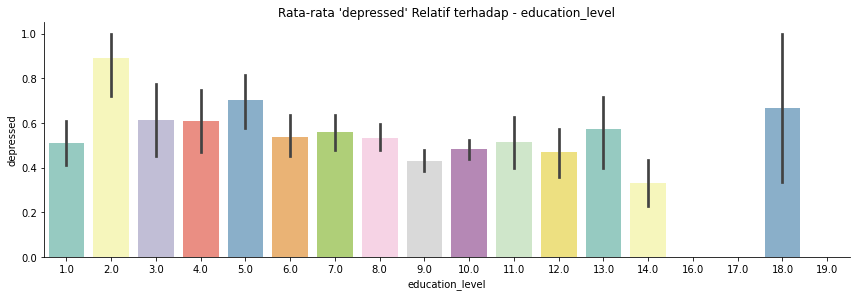

<Figure size 720x576 with 0 Axes>

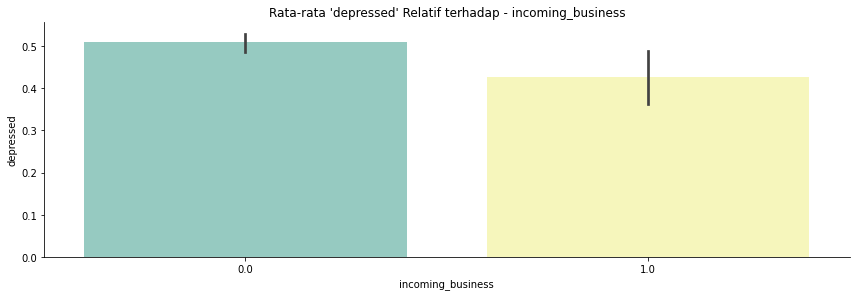

<Figure size 720x576 with 0 Axes>

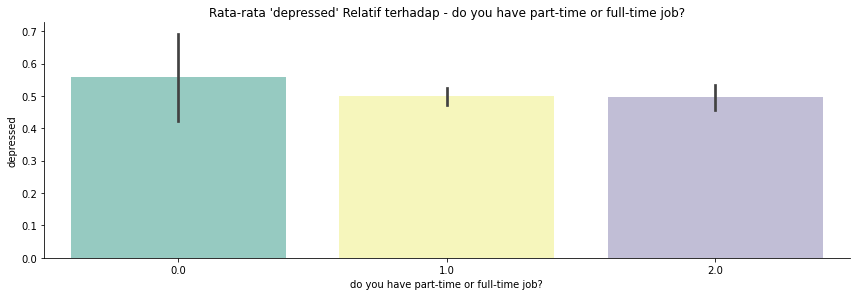

<Figure size 720x576 with 0 Axes>

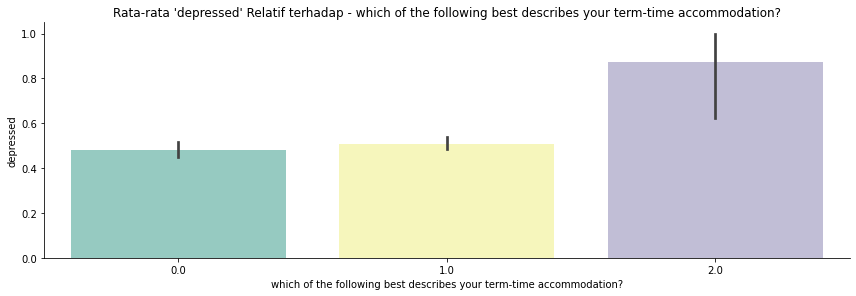

<Figure size 720x576 with 0 Axes>

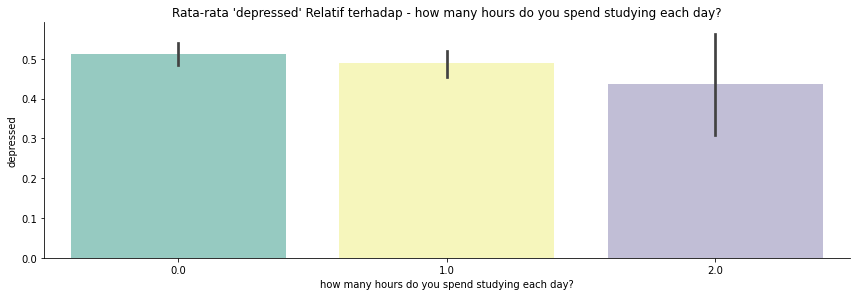

<Figure size 720x576 with 0 Axes>

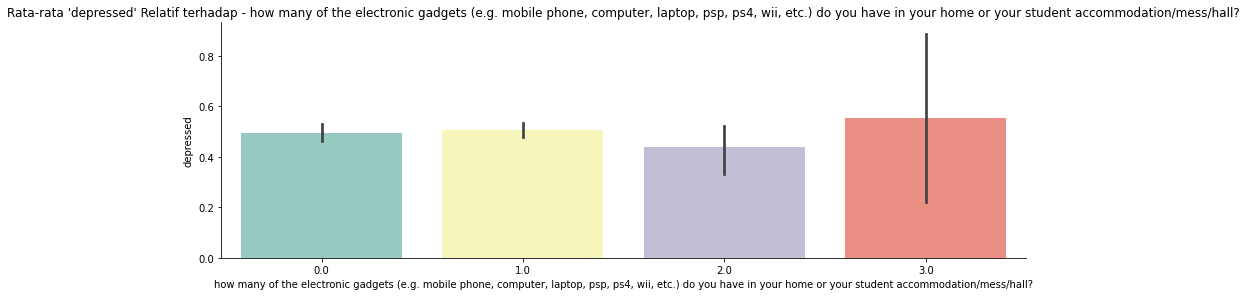

<Figure size 720x576 with 0 Axes>

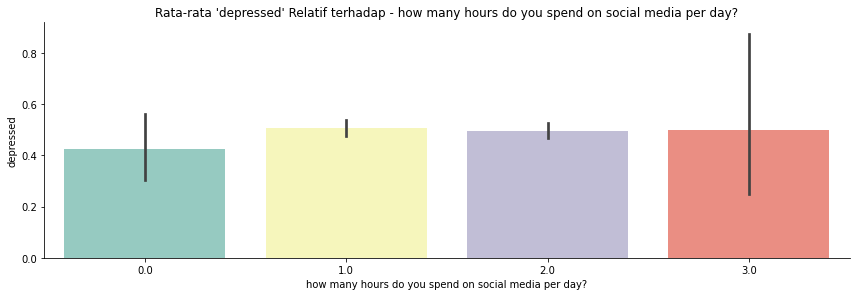

<Figure size 720x576 with 0 Axes>

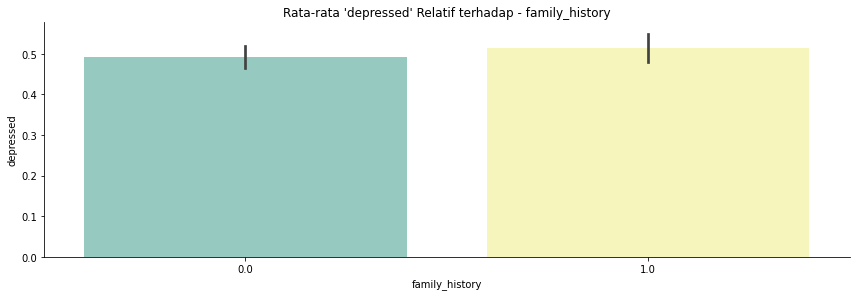

<Figure size 720x576 with 0 Axes>

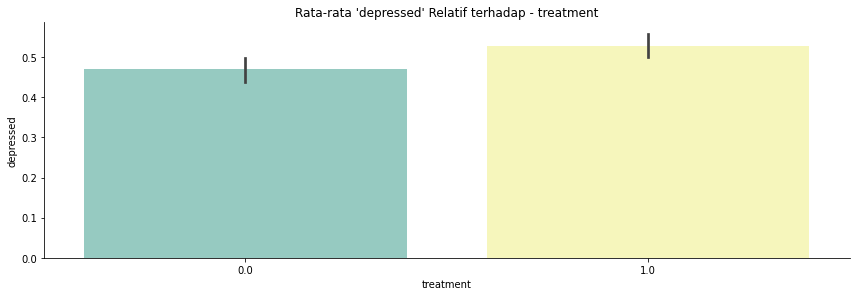

<Figure size 720x576 with 0 Axes>

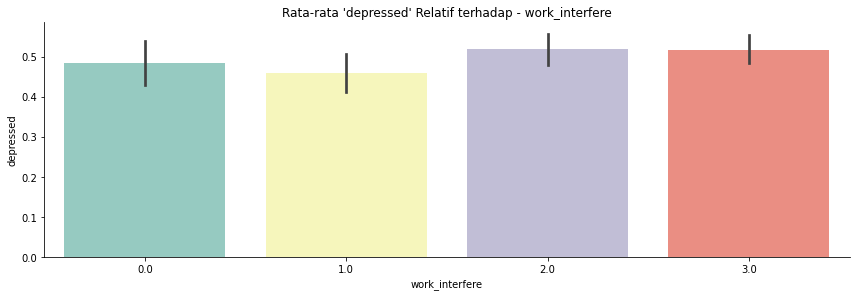

In [20]:
for column in categorical_columns:
  if column == "depressed":
    continue
  plt.figure(figsize=(10, 8))
  sns.catplot(x=column, y="depressed", kind="bar", dodge=False, height=4, aspect=3,  
              data=df, palette="Set3")
  plt.title("Rata-rata 'depressed' Relatif terhadap - {}".format(column))
  plt.show()

plt.show()

### Rubah nama kolom pada dataframe

In [21]:
sel_col = {'sex' : 'sex', \
           'age' : 'age', \
           'married' : 'married', \
           'do you have part-time or full-time job?': 'part_time', \
           'which of the following best describes your term-time accommodation?' : 'home', \
           'how many hours do you spend studying each day?' : 'study_time', \
           'how many of the electronic gadgets (e.g. mobile phone, computer, laptop, psp, ps4, wii, etc.) do you have in your home or your student accommodation/mess/hall?' : 'number_gadgets', \
           'how many hours do you spend on social media per day?' : 'socialmedia_time'}

df.rename(columns=sel_col, inplace=True)

In [22]:
df.columns

Index(['sex', 'age', 'married', 'education_level', 'incoming_business',
       'part_time', 'home', 'study_time', 'number_gadgets', 'socialmedia_time',
       'family_history', 'treatment', 'work_interfere', 'depressed'],
      dtype='object')

In [23]:
df.head()

,sex,age,married,education_level,incoming_business,part_time,home,study_time,number_gadgets,socialmedia_time,family_history,treatment,work_interfere,depressed
0,1.0,28.0,1.0,10.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0
1,1.0,23.0,1.0,8.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,1.0,22.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,1.0,27.0,1.0,10.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
4,0.0,59.0,0.0,10.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [24]:
for column in df:
    print(f'Kolom: {column}    Nilai: {df[column].unique()}')

Kolom: sex    Nilai: [1. 0.]
Kolom: age    Nilai: [28.         23.         22.         27.         59.         35.
 34.         21.         32.         29.         38.         56.
 24.         25.         44.         26.         40.         55.
 43.         51.         53.         36.         19.         31.
 41.         20.         18.         37.         33.         49.
 48.         42.         46.         30.         45.         52.
 39.         17.         57.         63.         62.         60.
 69.         47.         66.         65.         64.         54.
 68.         58.         67.         61.         50.         24.98797784
 48.94329858 42.81697961 31.88090024 51.38202438 23.37303082 52.87675881
 51.75213121 42.71795046 25.69815768 24.55207948 22.80793811 49.7441231
 61.23823958 22.29961284 32.75270554 61.54106972 29.64831592 19.45291271
 55.18780988 66.24833714 27.97199542 31.74400726 41.6816138  42.46256005
 34.62047933 42.97524055 26.24401906 30.14425807 24.02959994 36.55

In [25]:
for column in df.columns:
    df[column] = df[column].astype(np.int32)

In [26]:
df.dtypes

sex                  int32
age                  int32
married              int32
education_level      int32
incoming_business    int32
part_time            int32
home                 int32
study_time           int32
number_gadgets       int32
socialmedia_time     int32
family_history       int32
treatment            int32
work_interfere       int32
depressed            int32
dtype: object

In [27]:
df

,sex,age,married,education_level,incoming_business,part_time,home,study_time,number_gadgets,socialmedia_time,family_history,treatment,work_interfere,depressed
0,1,28,1,10,0,2,0,1,1,2,0,1,1,0
1,1,23,1,8,0,2,2,0,0,0,0,0,2,1
2,1,22,1,9,0,1,0,0,0,2,0,0,2,0
3,1,27,1,10,0,1,0,0,2,1,1,1,1,0
4,0,59,0,10,0,2,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1,37,1,10,0,0,1,0,2,1,0,0,3,1
2122,1,48,1,4,0,2,0,0,0,1,1,1,2,1
2123,1,17,1,7,0,1,1,1,0,1,0,0,2,1
2124,1,35,1,10,0,1,1,1,1,1,0,1,1,1


### Kita lihat hubungan dari setiap data

<Figure size 720x576 with 0 Axes>

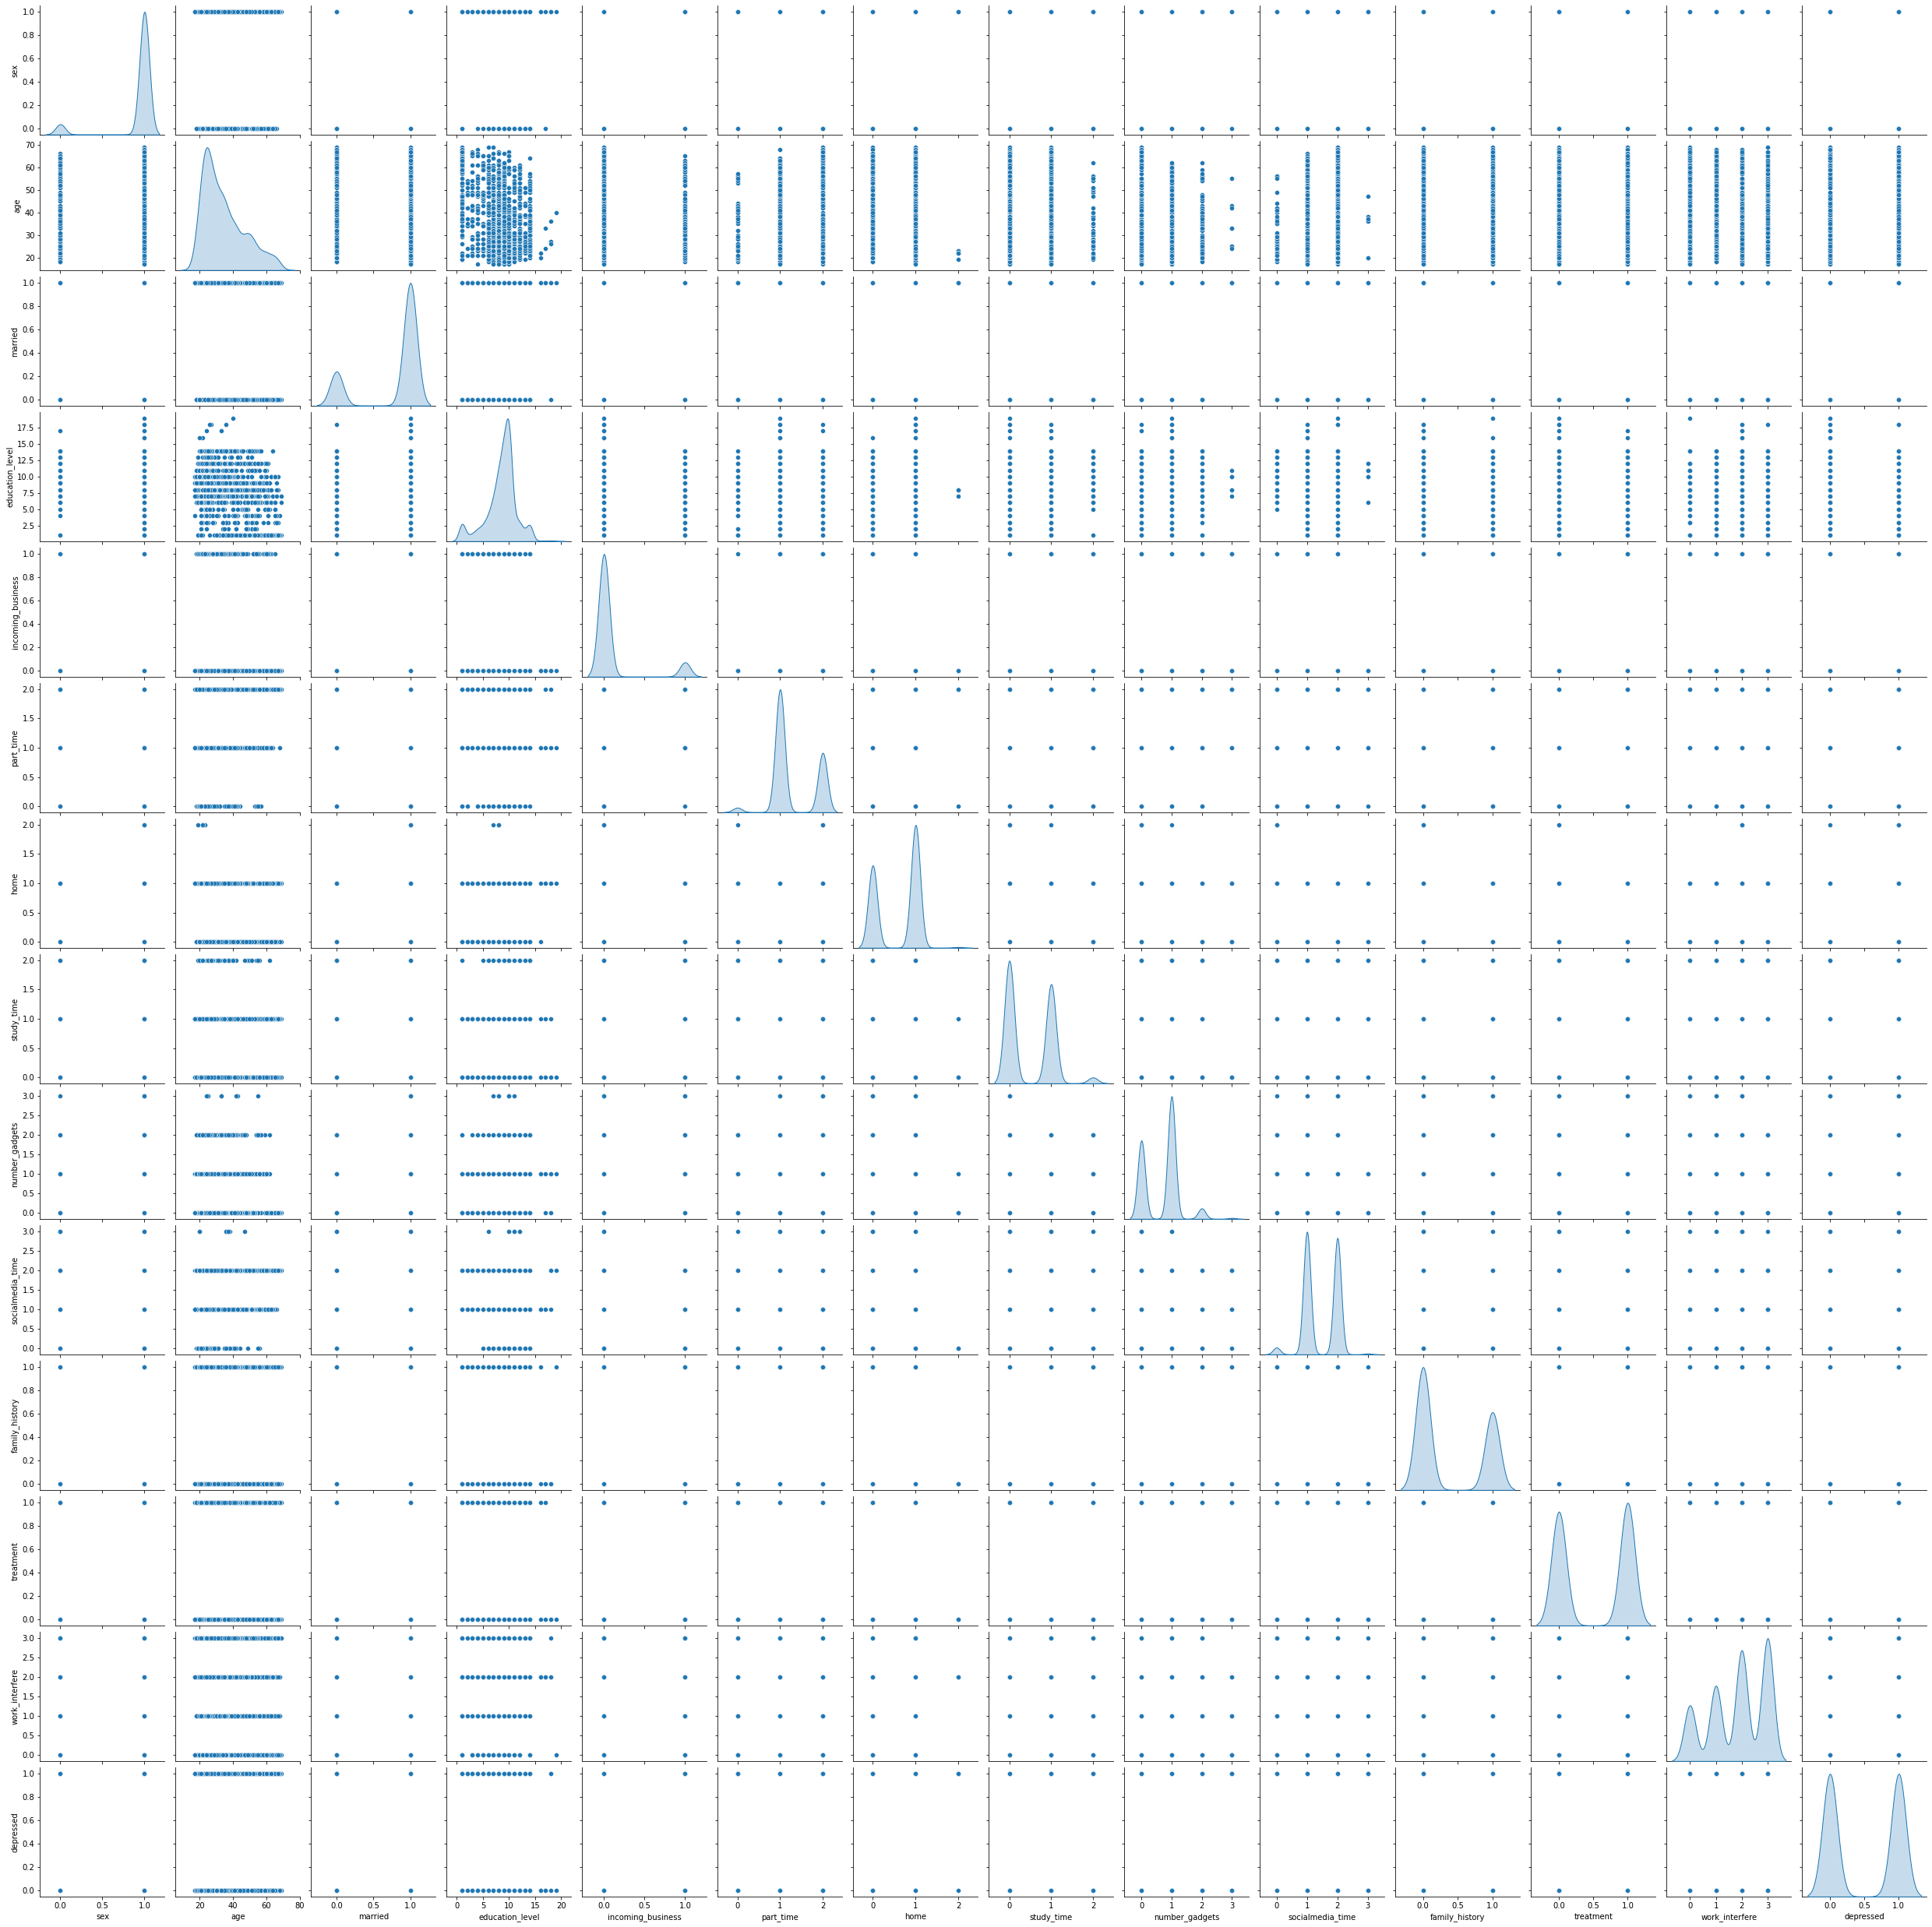

In [28]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind="kde")
plt.show()

### Kita lihat korelasi antar setiap kolom

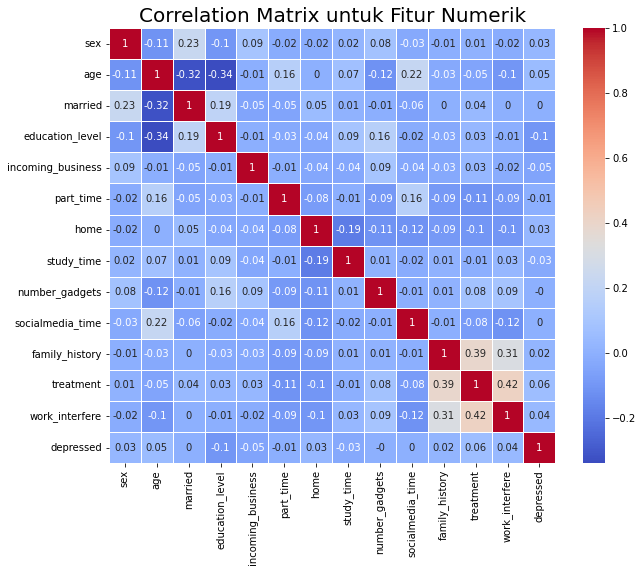

In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

### Kita tampilkan visualisasi data tersebut ke dalam data 2 dimensi, untuk mengetahui persebaran data tersebut

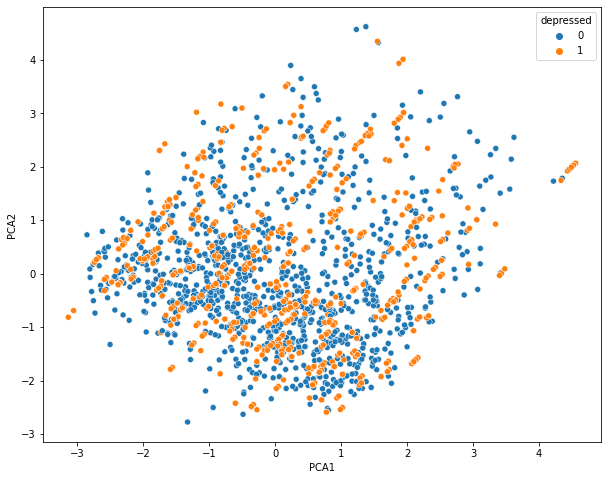

In [30]:
x = df.drop(columns=["depressed"])
y = df["depressed"]
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)
pca_data = pd.DataFrame(data=pca_data, columns = ['PCA1', 'PCA2'])
pca_data = pd.concat([pca_data, df[['depressed']]], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="depressed", data=pca_data)
plt.show()

### Kita pisahkan antara data x dan y dengan perbandingan data test 0.2%

In [31]:
x = df.drop(columns=["depressed"])
y = df["depressed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2126
Total # of sample in train dataset: 1700
Total # of sample in test dataset: 426


### Kita latih model tersebut dan standarisasi langsung

In [32]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
svm.fit(x_train, y_train)

xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])
xgb.fit(x_train, y_train)

nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb.fit(x_train, y_train)

dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
dt.fit(x_train, y_train)

knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn.fit(x_train, y_train)

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])
lr.fit(x_train, y_train)

rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf.fit(x_train, y_train)

ab = Pipeline([
    ('scaler', StandardScaler()),
    ('ab', AdaBoostClassifier())
])
ab.fit(x_train, y_train)

print("Semua model berhasil dibuat")

c:\users\pandu\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Semua model berhasil dibuat


### Pada model SVM kita lihat hasil untuk data train tersebut

In [33]:
report_svm_train = classification_report(y_train, svm.predict(x_train), output_dict=True)
report_svm_train = pd.DataFrame(report_svm_train).transpose()
report_svm_train

,precision,recall,f1-score,support
0,0.770238,0.756725,0.763422,855.000000
1,0.758140,0.771598,0.764809,845.000000
accuracy,0.764118,0.764118,0.764118,0.764118
macro avg,0.764189,0.764161,0.764116,1700.000000
weighted avg,0.764224,0.764118,0.764112,1700.000000


### Pada model SVM kita lihat confusion matriks dari data train tersebut

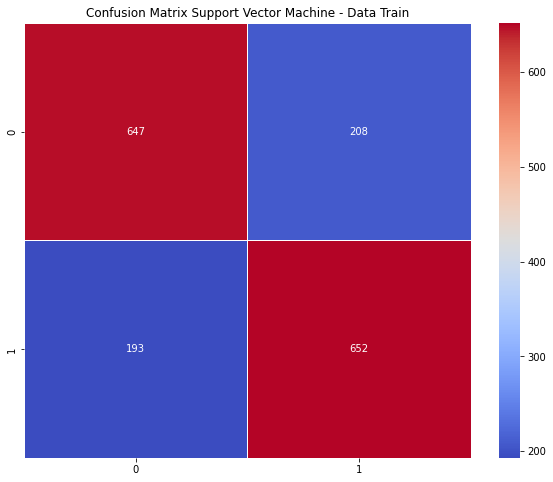

In [34]:
cm = confusion_matrix(y_train, svm.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Support Vector Machine - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model SVM kita lihat hasil untuk data test tersebut

In [35]:
report_svm_test = classification_report(y_test, svm.predict(x_test), output_dict=True)
report_svm_test = pd.DataFrame(report_svm_test).transpose()
report_svm_test

,precision,recall,f1-score,support
0,0.690608,0.600962,0.642674,208.000000
1,0.661224,0.743119,0.699784,218.000000
accuracy,0.673709,0.673709,0.673709,0.673709
macro avg,0.675916,0.672040,0.671229,426.000000
weighted avg,0.675571,0.673709,0.671899,426.000000


### Pada model SVM kita lihat confusion matriks dari data test tersebut

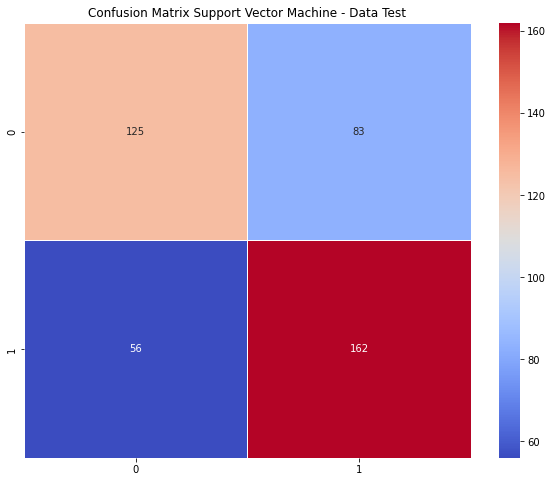

In [36]:
cm = confusion_matrix(y_test, svm.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Support Vector Machine - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model XGB kita lihat hasil untuk data train tersebut

In [37]:
report_xgb_train = classification_report(y_train, xgb.predict(x_train), output_dict=True)
report_xgb_train = pd.DataFrame(report_xgb_train).transpose()
report_xgb_train

,precision,recall,f1-score,support
0,0.993947,0.960234,0.976800,855.000000
1,0.961098,0.994083,0.977312,845.000000
accuracy,0.977059,0.977059,0.977059,0.977059
macro avg,0.977523,0.977158,0.977056,1700.000000
weighted avg,0.977619,0.977059,0.977054,1700.000000


### Pada model XGB kita lihat confusion matriks dari data train tersebut

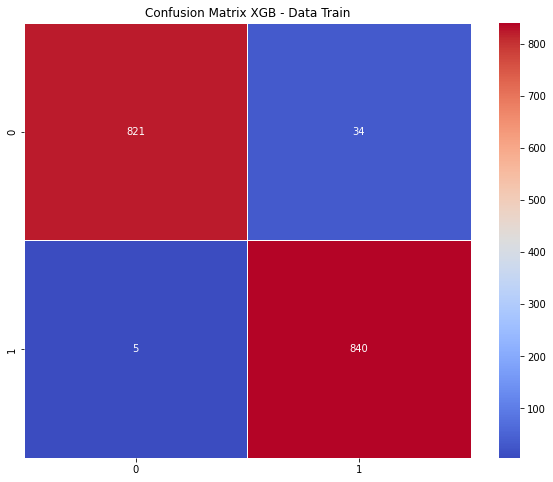

In [38]:
cm = confusion_matrix(y_train, xgb.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix XGB - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model XGB kita lihat hasil untuk data test tersebut

In [39]:
report_xgb_test = classification_report(y_test, xgb.predict(x_test), output_dict=True)
report_xgb_test = pd.DataFrame(report_xgb_test).transpose()
report_xgb_test

,precision,recall,f1-score,support
0,0.899441,0.774038,0.832041,208.000000
1,0.809717,0.917431,0.860215,218.000000
accuracy,0.847418,0.847418,0.847418,0.847418
macro avg,0.854579,0.845735,0.846128,426.000000
weighted avg,0.853526,0.847418,0.846459,426.000000


### Pada model XGB kita lihat confusion matriks dari data test tersebut

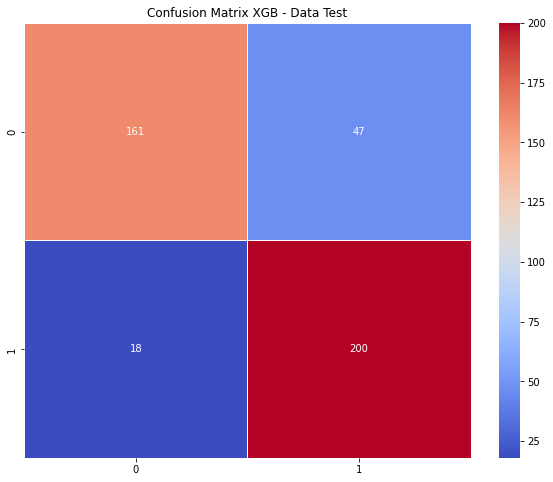

In [40]:
cm = confusion_matrix(y_test, xgb.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix XGB - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model NB kita lihat hasil untuk data train tersebut

In [41]:
report_nb_train = classification_report(y_train, nb.predict(x_train), output_dict=True)
report_nb_train = pd.DataFrame(report_nb_train).transpose()
report_nb_train

,precision,recall,f1-score,support
0,0.558376,0.385965,0.456432,855.000000
1,0.526601,0.691124,0.597748,845.000000
accuracy,0.537647,0.537647,0.537647,0.537647
macro avg,0.542488,0.538545,0.527090,1700.000000
weighted avg,0.542582,0.537647,0.526674,1700.000000


### Pada model NB kita lihat confusion matriks dari data train tersebut

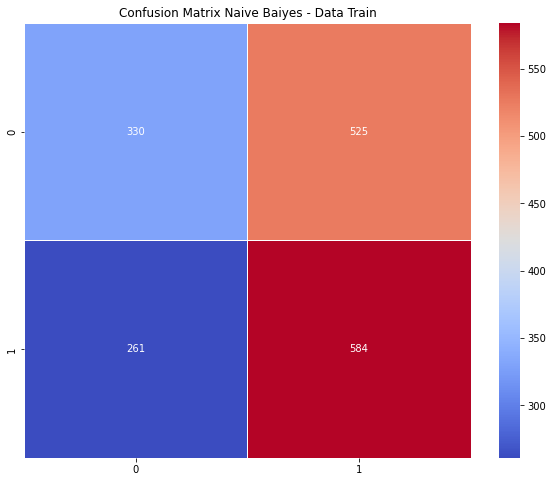

In [42]:
cm = confusion_matrix(y_train, nb.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Naive Baiyes - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model NB kita lihat hasil untuk data test tersebut

In [43]:
report_nb_test = classification_report(y_test, nb.predict(x_test), output_dict=True)
report_nb_test = pd.DataFrame(report_nb_test).transpose()
report_nb_test

,precision,recall,f1-score,support
0,0.564626,0.399038,0.467606,208.000000
1,0.551971,0.706422,0.619718,218.000000
accuracy,0.556338,0.556338,0.556338,0.556338
macro avg,0.558299,0.552730,0.543662,426.000000
weighted avg,0.558150,0.556338,0.545447,426.000000


### Pada model NB kita lihat confusion matriks dari data test tersebut

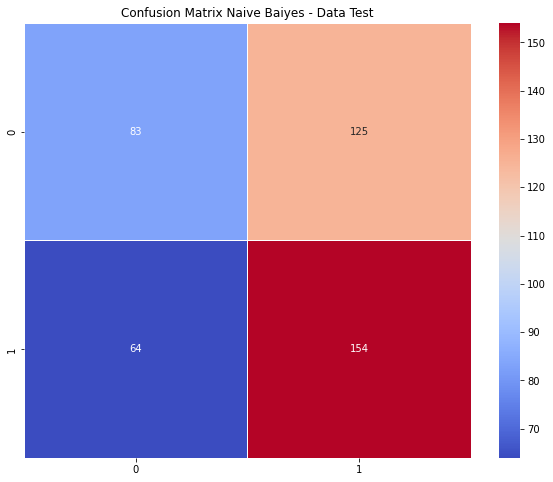

In [44]:
cm = confusion_matrix(y_test, nb.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Naive Baiyes - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()


### Pada model DT kita lihat hasil untuk data train tersebut

In [45]:
report_dt_train = classification_report(y_train, dt.predict(x_train), output_dict=True)
report_dt_train = pd.DataFrame(report_dt_train).transpose()
report_dt_train

,precision,recall,f1-score,support
0,0.996445,0.983626,0.989994,855.00
1,0.983645,0.996450,0.990006,845.00
accuracy,0.990000,0.990000,0.990000,0.99
macro avg,0.990045,0.990038,0.990000,1700.00
weighted avg,0.990083,0.990000,0.990000,1700.00


### Pada model DT kita lihat confusion matriks dari data train tersebut

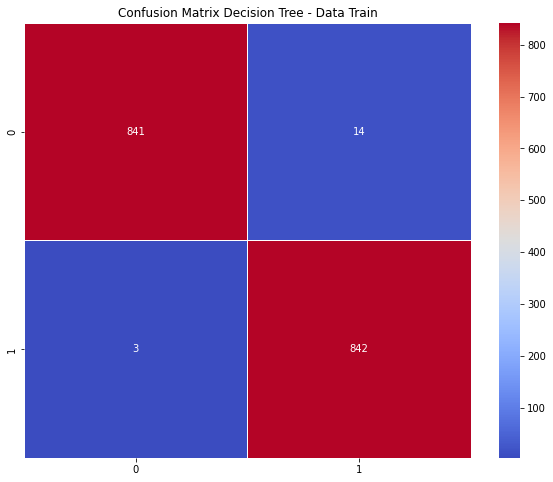

In [46]:
cm = confusion_matrix(y_train, dt.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Decision Tree - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model DT kita lihat hasil untuk data test tersebut

In [47]:
report_dt_test = classification_report(y_test, dt.predict(x_test), output_dict=True)
report_dt_test = pd.DataFrame(report_dt_test).transpose()
report_dt_test

,precision,recall,f1-score,support
0,0.887640,0.759615,0.818653,208.000000
1,0.798387,0.908257,0.849785,218.000000
accuracy,0.835681,0.835681,0.835681,0.835681
macro avg,0.843014,0.833936,0.834219,426.000000
weighted avg,0.841966,0.835681,0.834585,426.000000


### Pada model DT kita lihat confusion matriks dari data test tersebut

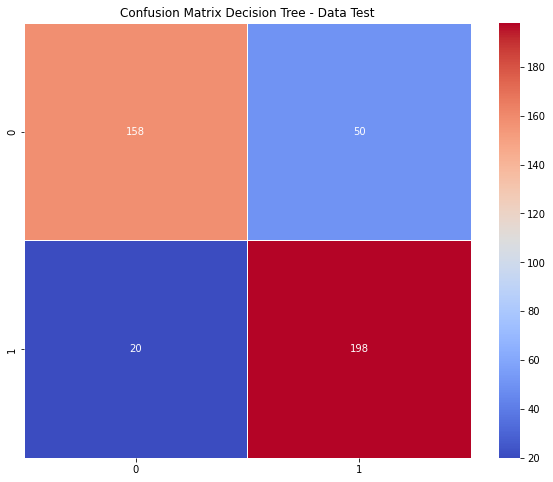

In [48]:
cm = confusion_matrix(y_test, dt.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Decision Tree - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model KNN kita lihat hasil untuk data train tersebut

In [49]:
report_knn_train = classification_report(y_train, knn.predict(x_train), output_dict=True)
report_knn_train = pd.DataFrame(report_knn_train).transpose()
report_knn_train

,precision,recall,f1-score,support
0,0.934295,0.681871,0.788371,855.000000
1,0.747212,0.951479,0.837064,845.000000
accuracy,0.815882,0.815882,0.815882,0.815882
macro avg,0.840753,0.816675,0.812717,1700.000000
weighted avg,0.841304,0.815882,0.812574,1700.000000


### Pada model KNN kita lihat confusion matriks dari data train tersebut

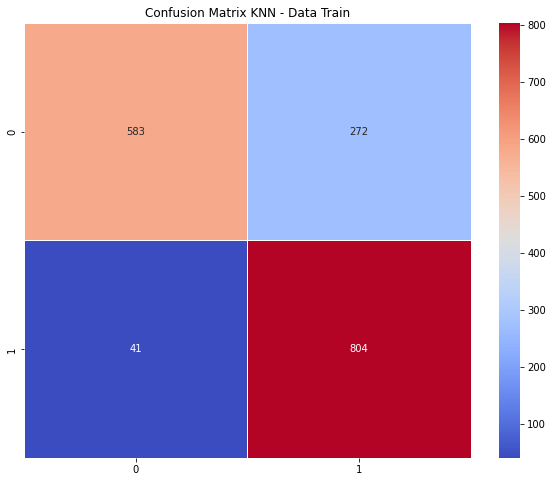

In [50]:
cm = confusion_matrix(y_train, knn.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix KNN - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model KNN kita lihat hasil untuk data test tersebut

In [51]:
report_knn_test = classification_report(y_test, knn.predict(x_test), output_dict=True)
report_knn_test = pd.DataFrame(report_knn_test).transpose()
report_knn_test

,precision,recall,f1-score,support
0,0.845070,0.576923,0.685714,208.000000
1,0.690141,0.899083,0.780876,218.000000
accuracy,0.741784,0.741784,0.741784,0.741784
macro avg,0.767606,0.738003,0.733295,426.000000
weighted avg,0.765787,0.741784,0.734412,426.000000


### Pada model KNN kita lihat confusion matriks dari data test tersebut

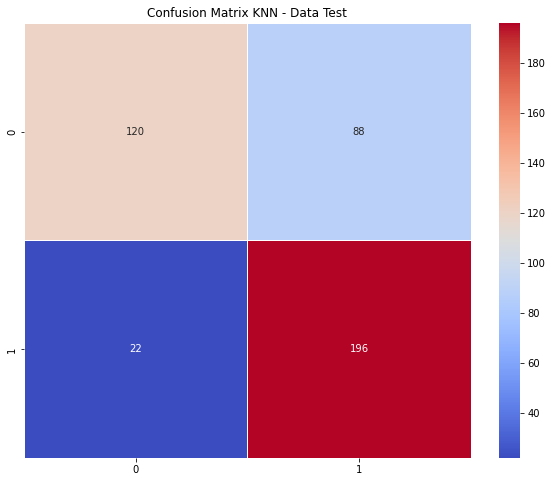

In [52]:
cm = confusion_matrix(y_test, knn.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix KNN - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model LR kita lihat hasil untuk data train tersebut

In [53]:
report_lr_train = classification_report(y_train, lr.predict(x_train), output_dict=True)
report_lr_train = pd.DataFrame(report_lr_train).transpose()
report_lr_train

,precision,recall,f1-score,support
0,0.535635,0.562573,0.548774,855.000000
1,0.533666,0.506509,0.519733,845.000000
accuracy,0.534706,0.534706,0.534706,0.534706
macro avg,0.534650,0.534541,0.534253,1700.000000
weighted avg,0.534656,0.534706,0.534339,1700.000000


### Pada model LR kita lihat confusion matriks dari data train tersebut

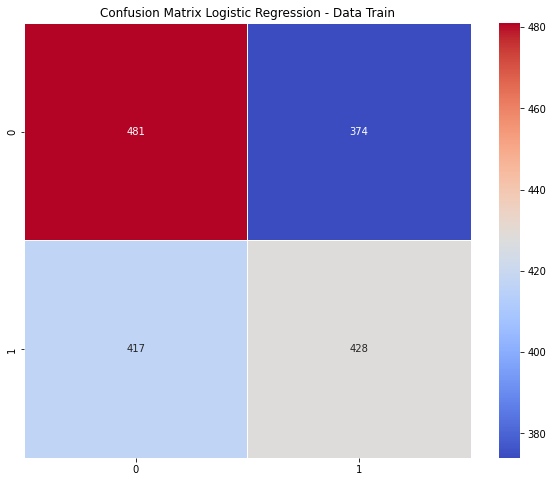

In [54]:
cm = confusion_matrix(y_train, lr.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Logistic Regression - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model LR kita lihat hasil untuk data test tersebut

In [55]:
report_lr_test = classification_report(y_test, lr.predict(x_test), output_dict=True)
report_lr_test = pd.DataFrame(report_lr_test).transpose()
report_lr_test

,precision,recall,f1-score,support
0,0.539130,0.596154,0.566210,208.000000
1,0.571429,0.513761,0.541063,218.000000
accuracy,0.553991,0.553991,0.553991,0.553991
macro avg,0.555280,0.554958,0.553636,426.000000
weighted avg,0.555659,0.553991,0.553341,426.000000


### Pada model LR kita lihat confusion matriks dari data test tersebut

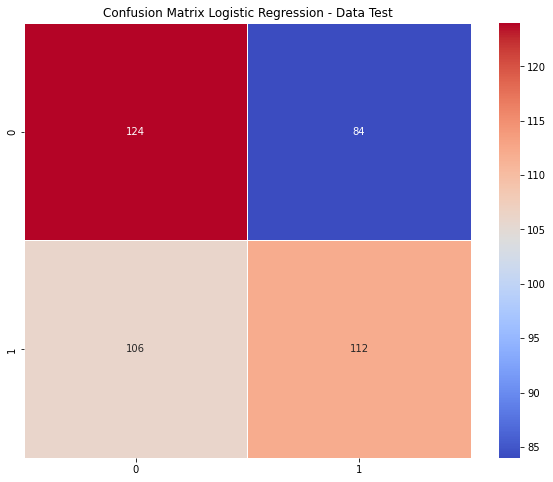

In [56]:
cm = confusion_matrix(y_test, lr.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Logistic Regression - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model RF kita lihat hasil untuk data train tersebut

In [57]:
report_rf_train = classification_report(y_train, rf.predict(x_train), output_dict=True)
report_rf_train = pd.DataFrame(report_rf_train).transpose()
report_rf_train

,precision,recall,f1-score,support
0,0.998810,0.981287,0.989971,855.00
1,0.981395,0.998817,0.990029,845.00
accuracy,0.990000,0.990000,0.990000,0.99
macro avg,0.990102,0.990052,0.990000,1700.00
weighted avg,0.990154,0.990000,0.990000,1700.00


### Pada model RF kita lihat confusion matriks dari data train tersebut

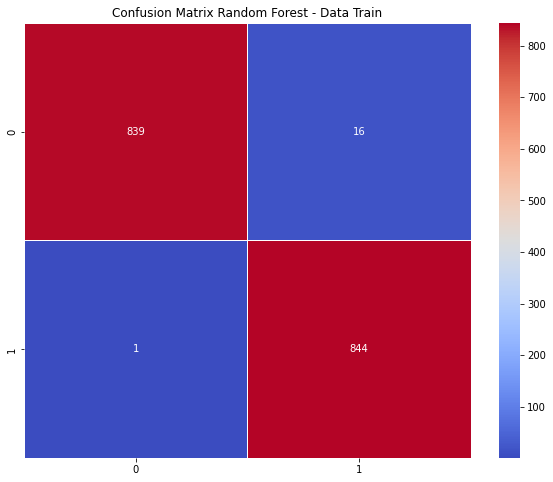

In [58]:
cm = confusion_matrix(y_train, rf.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Random Forest - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model RF kita lihat hasil untuk data test tersebut

In [59]:
report_rf_test = classification_report(y_test, rf.predict(x_test), output_dict=True)
report_rf_test = pd.DataFrame(report_rf_test).transpose()
report_rf_test

,precision,recall,f1-score,support
0,0.947368,0.865385,0.904523,208.000000
1,0.881356,0.954128,0.916300,218.000000
accuracy,0.910798,0.910798,0.910798,0.910798
macro avg,0.914362,0.909757,0.910411,426.000000
weighted avg,0.913587,0.910798,0.910549,426.000000


### Pada model RF kita lihat confusion matriks dari data test tersebut

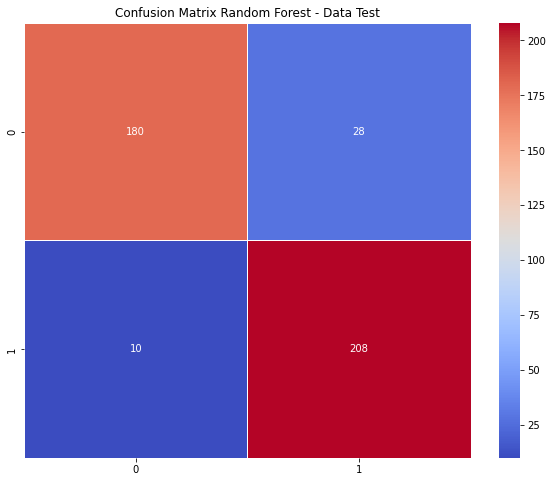

In [60]:
cm = confusion_matrix(y_test, rf.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Random Forest - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model AB kita lihat hasil untuk data train tersebut

In [61]:
report_ab_train = classification_report(y_train, ab.predict(x_train), output_dict=True)
report_ab_train = pd.DataFrame(report_ab_train).transpose()
report_ab_train

,precision,recall,f1-score,support
0,0.615215,0.652632,0.633371,855.00
1,0.625473,0.586982,0.605617,845.00
accuracy,0.620000,0.620000,0.620000,0.62
macro avg,0.620344,0.619807,0.619494,1700.00
weighted avg,0.620314,0.620000,0.619576,1700.00


### Pada model AB kita lihat confusion matriks dari data train tersebut

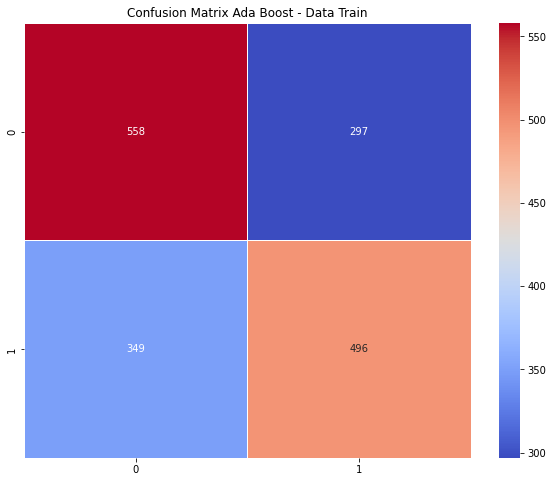

In [62]:
cm = confusion_matrix(y_train, ab.predict(x_train))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Ada Boost - Data Train")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Pada model AB kita lihat hasil untuk data test tersebut

In [63]:
report_ab_test = classification_report(y_test, ab.predict(x_test), output_dict=True)
report_ab_test = pd.DataFrame(report_ab_test).transpose()
report_ab_test

,precision,recall,f1-score,support
0,0.549587,0.639423,0.591111,208.000000
1,0.592391,0.500000,0.542289,218.000000
accuracy,0.568075,0.568075,0.568075,0.568075
macro avg,0.570989,0.569712,0.566700,426.000000
weighted avg,0.571491,0.568075,0.566127,426.000000


### Pada model AB kita lihat confusion matriks dari data test tersebut

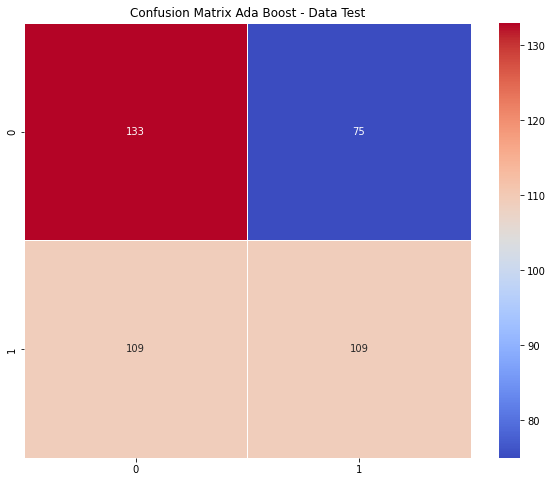

In [64]:
cm = confusion_matrix(y_test, ab.predict(x_test))
plt.figure(figsize=(10, 8))
plt.title("Confusion Matrix Ada Boost - Data Test")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.show()

### Kita plot hasil dari setiap model tersebut dengan bar plot

<Figure size 720x576 with 0 Axes>

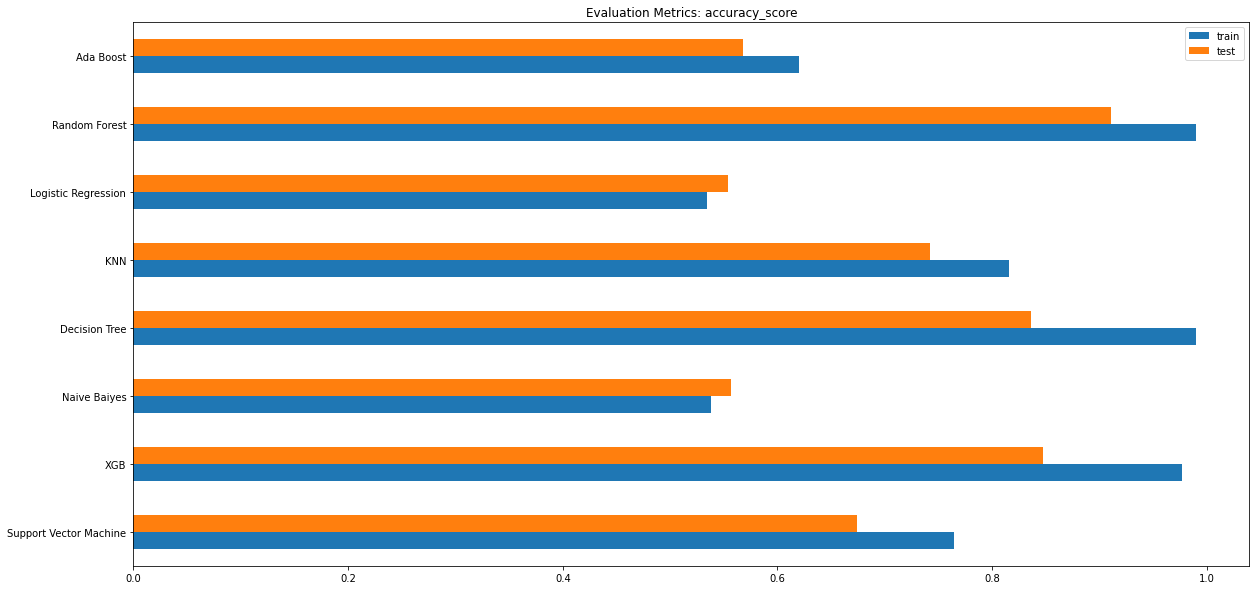

<Figure size 720x576 with 0 Axes>

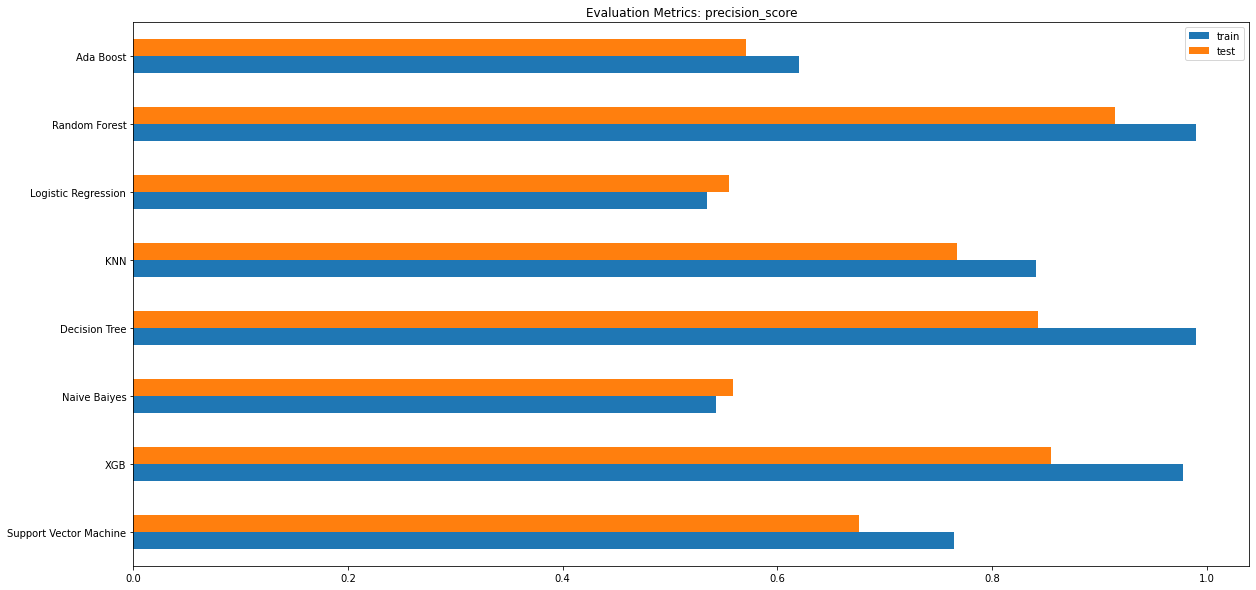

<Figure size 720x576 with 0 Axes>

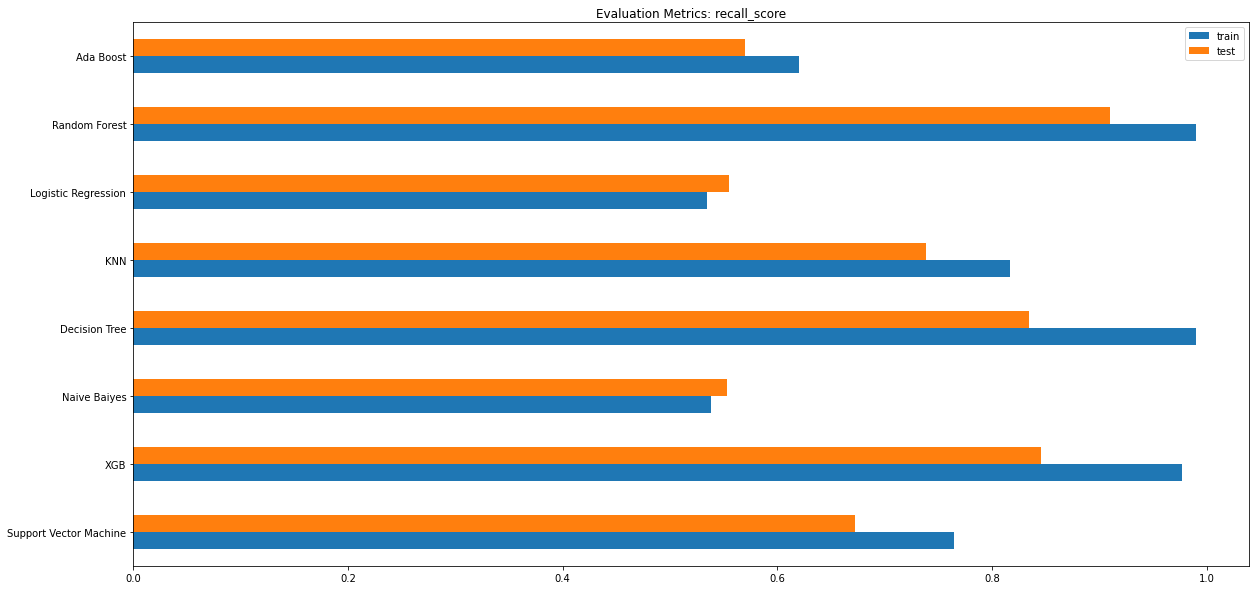

<Figure size 720x576 with 0 Axes>

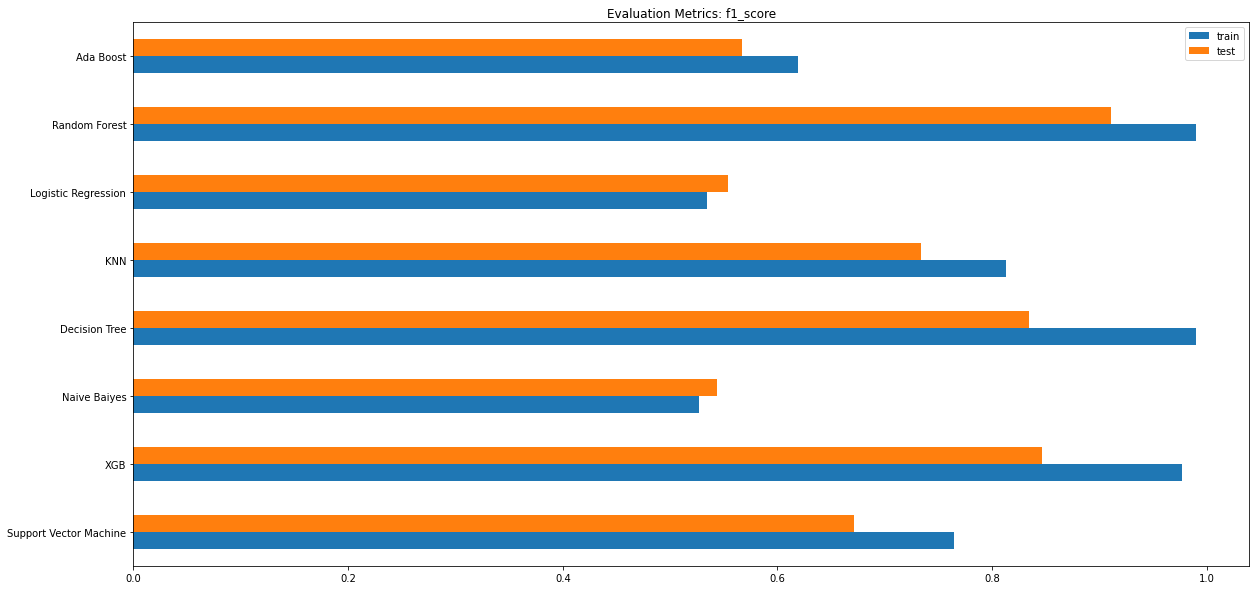

In [65]:
data_evaluation = {}
model_dict = {
    "Support Vector Machine": svm,
    "XGB": xgb,
    "Naive Baiyes": nb,
    "Decision Tree": dt,
    "KNN": knn,
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Ada Boost": ab
}
metrics_method = {
    "accuracy_score": accuracy_score,
    "precision_score": precision_score,
    "recall_score": recall_score,
    "f1_score": f1_score,
}
metrics = ["accuracy_score", "precision_score", "recall_score", "f1_score"]
for metric in metrics:
    data_evaluation[metric] = pd.DataFrame(columns=['train', 'test'], index=[
                                                        "Support Vector Machine","XGB",
                                                        "Naive Baiyes", "Decision Tree","KNN",
                                                        "Logistic Regression", 
                                                        "Random Forest", 
                                                        "Ada Boost"])
    for model_name, model in model_dict.items():
        if metric == "accuracy_score":
            data_evaluation[metric].loc[model_name, 'train'] = metrics_method[metric](y_true=y_train, 
                                                    y_pred=model.predict(x_train))
            data_evaluation[metric].loc[model_name, 'test'] = metrics_method[metric](y_true=y_test, 
                                                    y_pred=model.predict(x_test))
        else:
            data_evaluation[metric].loc[model_name, 'train'] = metrics_method[metric](y_true=y_train, 
                                                    y_pred=model.predict(x_train), average="macro")
            data_evaluation[metric].loc[model_name, 'test'] = metrics_method[metric](y_true=y_test, 
                                                    y_pred=model.predict(x_test), average="macro")

for metric in data_evaluation.keys():
    plt.figure(figsize=(10, 8))
    data_evaluation[metric].plot(kind='barh', figsize=(20, 10))
    plt.title(f"Evaluation Metrics: {metric}")
    plt.show()
    
plt.show()

### Kita lihat dalam bentuk tabel hasil dari akurasi dari setiap model tersebut

In [66]:
data_evaluation["accuracy_score"]

,train,test
Support Vector Machine,0.764118,0.673709
XGB,0.977059,0.847418
Naive Baiyes,0.537647,0.556338
Decision Tree,0.99,0.835681
KNN,0.815882,0.741784
Logistic Regression,0.534706,0.553991
Random Forest,0.99,0.910798
Ada Boost,0.62,0.568075


### Kita lihat dalam bentuk tabel hasil dari precision dari setiap model tersebut

In [67]:
data_evaluation["precision_score"]

,train,test
Support Vector Machine,0.764189,0.675916
XGB,0.977523,0.854579
Naive Baiyes,0.542488,0.558299
Decision Tree,0.990045,0.843014
KNN,0.840753,0.767606
Logistic Regression,0.53465,0.55528
Random Forest,0.990102,0.914362
Ada Boost,0.620344,0.570989


### Kita lihat dalam bentuk tabel hasil dari recall dari setiap model tersebut

In [68]:
data_evaluation["recall_score"]

,train,test
Support Vector Machine,0.764161,0.67204
XGB,0.977158,0.845735
Naive Baiyes,0.538545,0.55273
Decision Tree,0.990038,0.833936
KNN,0.816675,0.738003
Logistic Regression,0.534541,0.554958
Random Forest,0.990052,0.909757
Ada Boost,0.619807,0.569712


### Kita lihat dalam bentuk tabel hasil dari f1-score dari setiap model tersebut

In [69]:
data_evaluation["f1_score"]

,train,test
Support Vector Machine,0.764116,0.671229
XGB,0.977056,0.846128
Naive Baiyes,0.52709,0.543662
Decision Tree,0.99,0.834219
KNN,0.812717,0.733295
Logistic Regression,0.534253,0.553636
Random Forest,0.99,0.910411
Ada Boost,0.619494,0.5667


### Kita bandingkan hasil dari setiap model tersebut

In [70]:
prediksi = x_test.iloc[:5].copy()
pred_dict = {'y_true': y_test.iloc[:5].copy()}
for name, model in model_dict.items():
    pred_dict['Prediksi '+ name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,Prediksi Support Vector Machine,Prediksi XGB,Prediksi Naive Baiyes,Prediksi Decision Tree,Prediksi KNN,Prediksi Logistic Regression,Prediksi Random Forest,Prediksi Ada Boost
1639,1,1,1,0,1,1,0,1,0
460,0,0,0,1,0,0,1,0,1
657,0,1,1,1,0,1,0,0,0
1813,1,1,1,1,1,1,1,1,0
910,0,0,1,1,0,1,0,1,1


### Kita save model tersebut

In [71]:
for model_name, model in model_dict.items():
    joblib.dump(model, f"saved_model/{model_name}.joblib")